#                    Исследование сервиса аренды самокатов **GoFast**

### Цели исследования.

- Проанализировать данные и дать рекомендации бизнесу для роста.


- Выполнить исследовательский анализ полученных данных , для выявления закономерностей которые можно использовать для улучшения сервиса.


- Проанализировать данные о пользователях с подпиской и без и оценить их с позиции получения выручки.


### Ход исследования.

- Загрузим предоставленные нам данные


- Предобработаем данные,  избавившись от дубликатов и пропущенных значений , а так же добавим новые столбцы для облегчения дальнейшего исследования


- Проведем исследовательский анализ данных , выяснив : частоту встречаемости городов , соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние которое пользователь преодолел за одну поездку , продолжительность поездок/


- Обьеденим данные , создав две выборки данных для пользователей с подпиской и без.


- Проанализируем полученную выручку.


- Займемся проверкой гипотез , которые должны помочь увеличить приток пользователей с подпиской.


- Оценим эффективность рекламной компании , проанализировав различные распределения.

### Описание переменных представленных в данных.

`user_id` уникальный идентификатор пользователя

`name` имя пользователя

`age` возраст

`city` город

`subscription`_type тип подписки (free, ultra)

`distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)

`duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

`date`	дата совершения поездки

`minute_price`	стоимость одной минуты поездки по данной подписке

`start_ride_price`	стоимость начала поездки

`subscription_fee`	стоимость ежемесячного платежа

## Загрузка данных

### Импорт необходимых при исследовании библиотек

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import stats as st
from math import sqrt
from scipy.stats import binom, norm

### Загрузка предоставленных данных

In [41]:
try:
    df_user = pd.read_csv('/datasets/users_go.csv')
except:
    df_user = pd.read_csv('users_go.csv')

In [42]:
try:
    df_ride = pd.read_csv('/datasets/rides_go.csv')
except:
    df_ride = pd.read_csv('rides_go.csv')

In [43]:
try:
    df_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    df_sub = pd.read_csv('subscriptions_go.csv')

### Первичное ознакомление с данными

**Данные о пользователях**

In [44]:
display(df_user.head())
df_user.shape

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


(1565, 5)

In [45]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [46]:
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


Датафрейм `df_user` содержит **1565** строк , при первом взгляде каких либо аномалий в данных не наблюдаеться.

**Данные о поездках**

In [47]:
display(df_ride.head())
df_ride.shape

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


(18068, 4)

In [48]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [49]:
df_ride.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


Датафрейм `df_ride` длинной в **18068** строк, содержит записи о всех поездках совершенными клиентами , удалось обнаружить несоответствие типа данных в столбце `date` с чем мы разберемся на этапе предобработки данных. В остальном аномалий в данных заметить не удалось.

**Данные о подписке**

In [50]:
display(df_sub.head())
df_sub.shape

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


(2, 4)

Датафрейм df_sub содержит всего 2 строки с информацией о тарифных планах представленных в сервисе проката **GoFast**

### Вывод

- На входе нам поступило 3 набора данных `user_go` , `ride_go` , `subscriptions_go` , которые соответственно содержат информацию о пользователях , количестве и продолжительности поездок и типы существующих подписок. При первичном ознакомлении с данными за исключением столбца `date` в **df_ride** который имеет неподходящий тип данных, каких либо аномалий выявлено не было , подробней изучим этот вопрос на этапе предобработки данных.


## Предобработка данных

### Преобразуем переменную `date` из *df_ride* в надлежащий тип данных.

На этапе загрузки и первичного ознакомления с данными было выявлено несоответствие типа данных в столбце `date` датафрема **df_ride** , исправим это.

In [51]:
df_ride['date'] = df_ride['date'].apply(pd.to_datetime)
display(df_ride['date'].head())
#df_ride.info()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

### Добавим переменную ``month`` в набор данных *df_ride*

Для удобства дальнейшего исследования добавим столбец содержащий номер месяца.

In [52]:
df_ride['month'] = df_ride['date'].dt.month
df_ride.head(3)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4


### Исследуем наличие дубликатов и пропущенных значений в наших датафреймах.

#### Набор данных *df_user* содержащий информацию о пользователях.

**Проанализируем наличие дубликатов**

In [53]:
# создаем копию датасета до преобразования
temp_user = df_user.copy()
len(temp_user)

1565

In [54]:
# уберем ограничение на отображение строк
pd.set_option('display.max_rows', None) 

#Вывод дубликатов
print('Дубликатов найдено :', df_user.duplicated().sum())
dup = df_user[df_user.duplicated(keep=False)].sort_values('user_id')
display(dup)

Дубликатов найдено : 31


,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1539,43,Стефания,22,Омск,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
1563,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
1549,108,Влада,29,Тюмень,ultra


В наборе данных **df_user** обнаружились дубликаты содержащие повторную информацию о нескольких пользователях.

**Причиной появления** считаю программный сбой в момент выгрузки данных или же в момент регистрации пользователя из за повторного нажатия кнопки регистрации.
Проанализируем процентное количество дубликатов , для выбора оптимальной стратегии по их обработке.


In [55]:
print(f'Процент дубликатов от общего числа равен : {(df_user.duplicated().sum()/len(df_user)*100).round(2)}%')

Процент дубликатов от общего числа равен : 1.98%


Количество дубликатов составило **31** , что состовляет примерно **2%** от общего числа данных в **1565** сторок.

Процент дубликатов оказался достаточно не значительным , поэтому их удаление не окажет сущшественого влияния на исследования , но в тоже время сделает данные более чистыми.

In [56]:
df_user = df_user.drop_duplicates(keep='first');
print('Количество строк до удаления дубликатов :', len(temp_user))
print('Количество строк после удаления дубликатов :', len(df_user))

Количество строк до удаления дубликатов : 1565
Количество строк после удаления дубликатов : 1534


**Проанализируем пропущенные значения**

In [57]:
df_user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков в наборе данных `df_user` выявленно не было.

#### Набор данных *df_ride* содержащий информацию о поездках.

**Проверим наличие дубликатов**

In [58]:
df_ride.duplicated().sum()

np.int64(0)

Наличие явных дубликатов не обнаружено.

**Проверим количество пропущенных значений**

In [59]:
df_ride.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропусков в датафрейме *df_ride* так же обнаружить не удалось.

#### Набор данных *df_sub* содержащий информацию о типах подписки.

In [60]:
df_sub

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Набор данных *df_sub* содержит всего 2 строчки с описанием тарифных планов , какая либо предобработка ему не требуется.

### Обработка числовых переменных

Приведем наши числовые непрерывные переменные к более читаемому виду , сократив количество знаков после запятой.

In [61]:
df_ride['duration'] = df_ride['duration'].round(2)
df_ride['distance'] = df_ride['distance'].round(2)
df_ride.head(5)

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8


### Вывод

- В этом блоке исследования мы преобразовали тип данных столбца `date` датафрейма *df_ride* из типа *object* в тип *datatime* что обеспечит нам в дальнейшем возможность работы с ним.


- Мы добавили столбец `month` в датафрейм *df_ride* содержащий номер месяца , для дальнейшего исследования.


- Мы проверили наличие дубликатов и пропусков в наших данных и выполнили их обработку ,  что обеспечит нам более чистые данные.


- Обработали числовые значения , для придания им более читаемого вида.


## Исследовательский анализ данных

### Анализ популярности сервиса по городам.

Рассмотрим количество активных пользователей в разных городах.

In [62]:
display(df_user.groupby('city').size().to_frame().rename(
    columns={0: 'Кол-во'}).rename_axis('Город').sort_values('Кол-во'))
citys = df_user.groupby('city').size().reset_index(name='count').sort_values('count')

,Кол-во
Город,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


Видим значительную для представленных величин разницу в 51 между первым и последним местом в таблице. Построим для наглядности график.

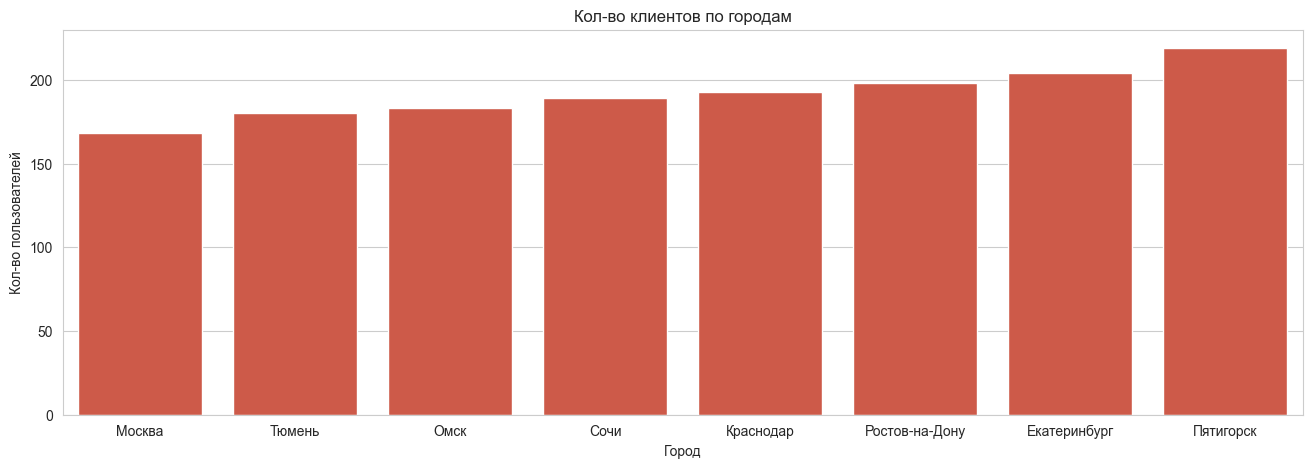

In [63]:
# Зададим стиль графиков
sns.set_style('whitegrid')
sns.set_palette('RdYlBu')

# график
plt.figure(figsize=(16, 5))
sns.barplot(x='city',y='count', data=citys)
plt.title('Кол-во клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Кол-во пользователей')
plt.show()

**Из таблицы и графика наблюдается небольшой разброс в количестве клиентов в разных городах.**

- Такие данные могут быть обусловлены тем что в таком городе как **Москва** достаточно плотный трафик как машин и пешеходов , так же в **Москве** самая развитая система общественного транспорта в том числе и метро , что делает перемещение на самокате не самым приоритетным способом передвижения , так же одной из причин самого низкого числа клиентов сервиса **Gofast** может выступать высокая конкуренция в таком мегаполисе.


- В свою очередь в таких городах как **Сочи, Краснодар и Пятигорск** наблюдается повышенный спрос на услуги сервиса в сравнении с другими городами. Причиной этому может служить то что эти города являются курортными и в силу погодных условий и постоянного потока туристов , спрос на самокаты остаётся высоким и не теряет своей актуальности с наступлением зимы.


- Спрос на индивидуальное передвижение на небольшие расстояния в таких городах как **Тюмень, Омск, Ростов-на-Дону, Екатеринбург**, можно объяснить , низкой частотой движения общественного транспорта и спросом на передвижение на средние и малые дистанции.

### Анализ соотношения пользователей с подпиской и без подписки.

Получим общее количество платных и бесплатных тарифных планов.

In [64]:
df_user.groupby('subscription_type').size().to_frame().rename(
    columns={0: 'Кол-во'}).rename_axis('Тип подписки').sort_values('Кол-во')

,Кол-во
Тип подписки,
ultra,699
free,835


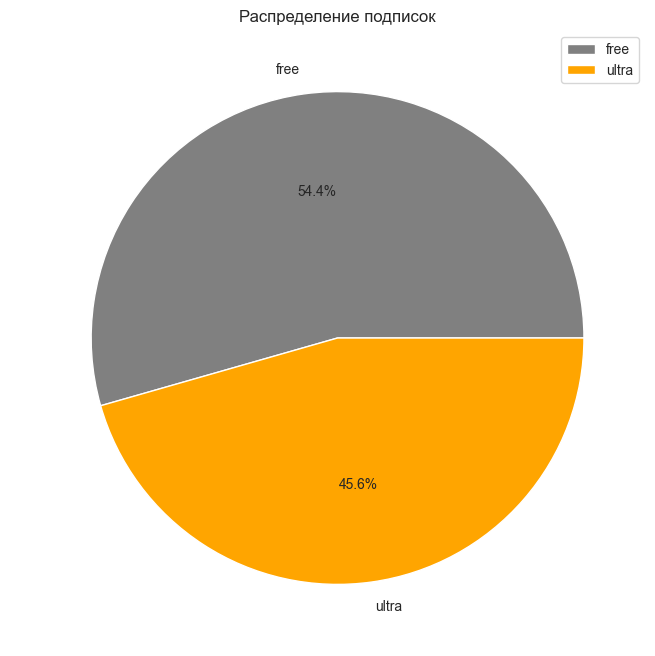

In [65]:
df_user.groupby('subscription_type').size().plot(
    kind='pie', y='count', x='subscription_type', colors=['grey', 'orange'], figsize=(8,8), autopct='%1.1f%%')
plt.title('Распределение подписок')
plt.ylabel(' ')
plt.legend()
plt.show()

Такая разница в используемых клиентами тарифах может быть объяснена тем что , пользователи тарифа **free** пользуются услугами сервиса реже и носит характер разовых поездок, что делает оформление подписки **ultra** в их глазах не целесообразным.

**Проанализируем распределение типа подписки по городам**

Рассмотрим как распределились типы подписок **ultra и free** в разных городах.

In [66]:
city_sub = df_user.pivot_table(index='subscription_type', columns='city', values='user_id', aggfunc='count'
                   ).rename_axis('Тип Подписки', axis=0).rename(columns={'city' : ''})
city_sub

city,Екатеринбург,Краснодар,Москва,Омск,Пятигорск,Ростов-на-Дону,Сочи,Тюмень
Тип Подписки,,,,,,,,
free,112,112,84,92,125,109,103,98
ultra,92,81,84,91,94,89,86,82


Из таблицы видно что клиентские предпочтения относительно используемого типа подписки , разняться от города к городу.

Построим графики что бы выразительней отразить эту разницу.

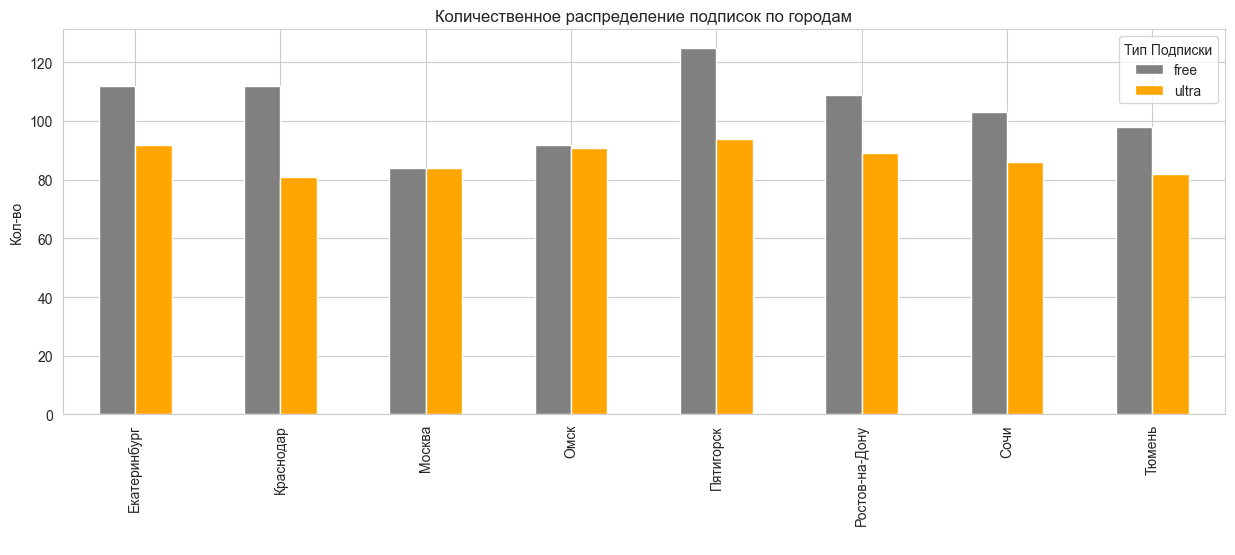

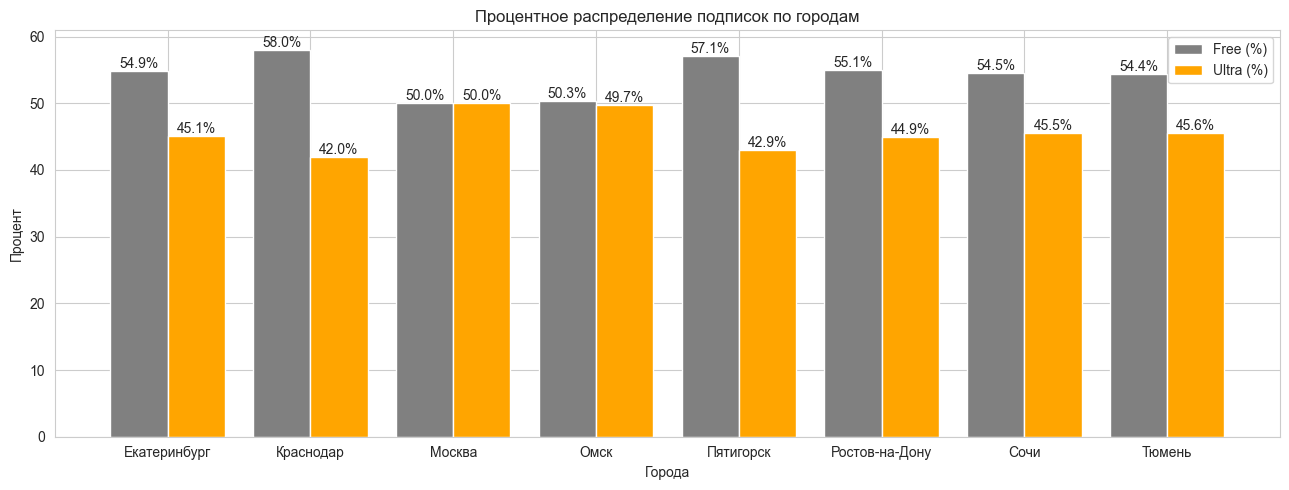

In [67]:
#Числовой график
city_sub.T.plot(kind='bar', color=['grey', 'orange'], figsize=(
    15,5), title='Количественное распределение подписок по городам', xlabel=' ', ylabel='Кол-во')
plt.show()

#Процентный график
graph = city_sub.T.reset_index()
graph['total'] = graph['free'] + graph['ultra']
graph['free_percent'] = (graph['free'] / graph['total']) * 100
graph['ultra_percent'] = (graph['ultra'] / graph['total']) * 100

plt.figure(figsize=(13, 5))
bar_width = 0.4
index = range(len(graph['city']))

# Столбцы для процентов
bars1 = plt.bar(index, graph['free_percent'], bar_width, label='Free (%)', color='grey')
bars2 = plt.bar([i + bar_width for i in index], graph['ultra_percent'], bar_width, label='Ultra (%)', color='orange')

# Подписи процентов над столбцами
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.xlabel('Города')
plt.ylabel('Процент')
plt.title('Процентное распределение подписок по городам')
plt.xticks([i + bar_width / 2 for i in index], graph['city'])
plt.legend()
plt.tight_layout()
plt.show()

**Можно сделать следующие выводы :**

- Данные на графике показывают что за исключением таких городов как **Москва и Омск** везде наблюдается преобладающие количество пользователей тарифа **Free**.


- Практически равное количество пользователи тарифов **free** и **ultra** представлено в городах **Москва и Омск**


- Данные по **Москве** могут иметь корреляцию с тем что в этом городе высокий уровень жизни и как следствие клиенты обладают более высоким доходом что делает покупку подписки **ultra** более доступной.


- В **Омске** возможно наблюдаются проблемы с общественным транспортом , что делает передвижение по подписке для постоянных клиентов тарифа **ultra** более выгодным , так же на количество клиентов могли оказать влияние такие факторы как низкая конкуренция в этом сегменте и успешно проведенная рекламная компания.


- Популярность тарифа **free** в остальных городах , может быть обусловлена малой площадью самого города и более регулярными передвижениями городского транспорта , что делает использование самоката на постоянной основе не самым удобным решением для клиентов.


### Анализ возраста клиентов сервиса

Попытаемся определить основную возрастную группу пользователей сервиса.

In [68]:
df_user['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [69]:
#уберем ограничение на отображение стобцов
pd.set_option('display.max_columns', None)
# таблица возрастов
df_user['age'].value_counts().to_frame().rename(columns={'age' : ' '}).T

age,25,24,26,23,22,27,28,21,20,29,30,31,19,18,32,33,17,16,34,35,15,14,13,36,12,38,37,39,43
count,145,132,131,129,119,119,112,93,71,68,68,48,47,46,41,39,26,19,19,15,13,9,8,6,4,3,2,1,1


Из таблицы видно что основная возрастная группа представлена в диапазоне от **20** до **30** лет.

Построим для более наглядной демонстрации график распределения по конкретным возрастам и агрегированную по возрастным группам диаграмму.

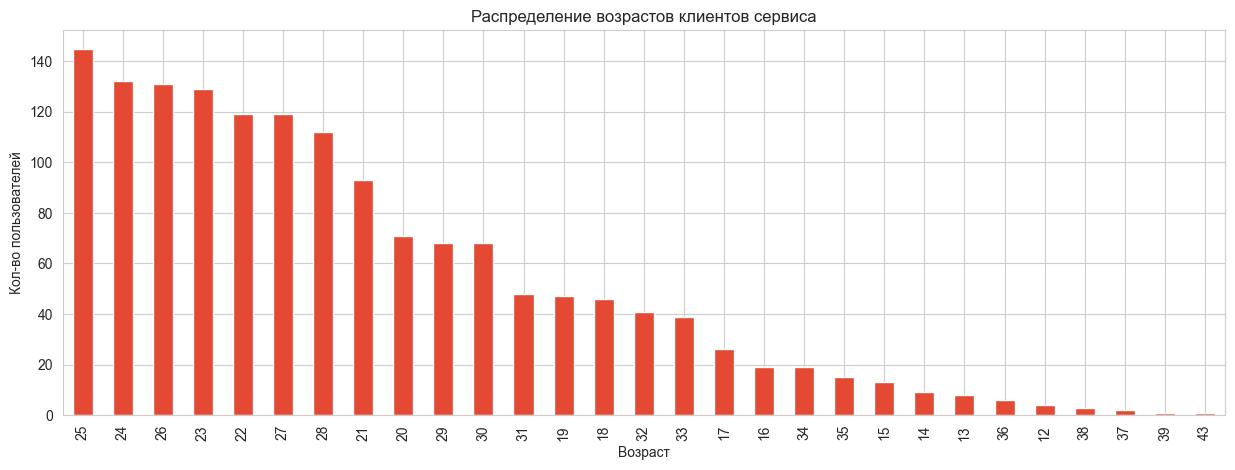

In [70]:
df_user['age'].value_counts().plot(kind='bar', figsize=(15,5), title='Распределение возрастов клиентов сервиса', 
                                  xlabel='Возраст', ylabel='Кол-во пользователей');

C:\Users\para\AppData\Local\Temp\ipykernel_26448\3424415461.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gr = df_user.groupby('age_group').size()


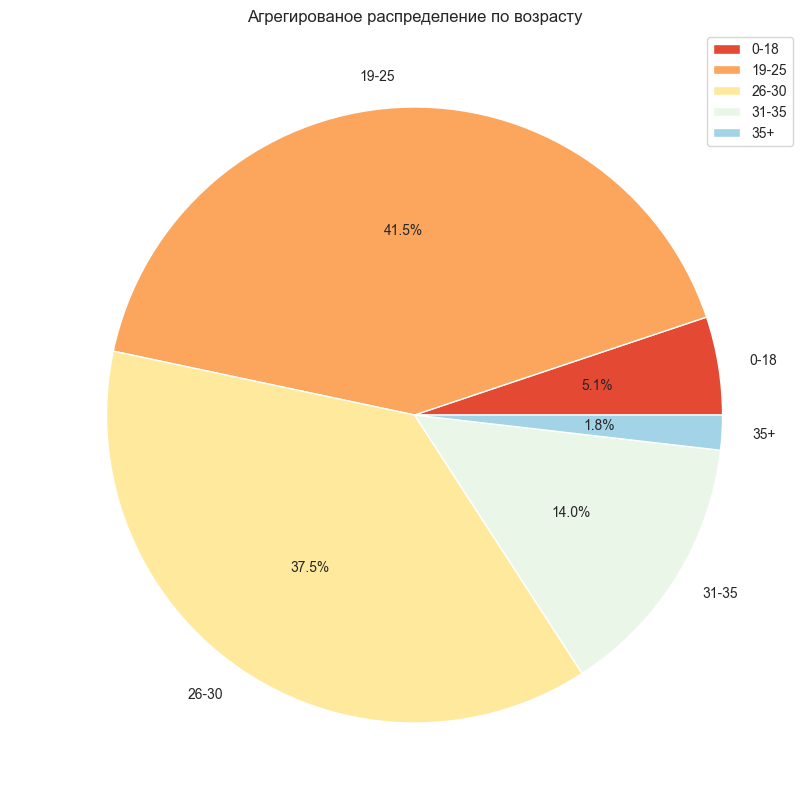

In [71]:
bins = [0, 18, 25, 30, 35, 50]  # Определяем возрастные группы
labels = ['0-18', '19-25', '26-30', '31-35', '35+']  # Метки для групп

df_user['age_group'] = pd.cut(df_user['age'], bins=bins, labels=labels, right=False)

# Аггрегация по группам
age_gr = df_user.groupby('age_group').size()
age_gr.plot(kind='pie', figsize=(10,10), title='Агрегированое распределение по возрасту', 
            ylabel=' ', autopct='%1.1f%%')
plt.legend()
plt.show()

**Из проведенного анализа можно сделать следующие выводы:**

- Целевой возрастной группой сервиса являются клиенты в возрасте от **19** до **30** лет (суммарно **79%**) , что легко объяснимо тем что сервисы проката самокатов пришли на рынок относительно не давно , и приобрели популярность у *молодежи* и людей не обладающих еще в силу возраста личным средством мобильности , куда и входит основная масса клиентов нашего сервиса.


- Предположительно в силу отсутствия личных финансовых средств , группа клиентов до **18** лет представлена слабо (всего **5.1%**)


- Группа более возрастных клиентов **35+** практически не представлена (**всего 1.8%**) , в силу возраста и консервативности взглядов эти клиенты проявляют недоверие к электросамокатам. Так же люди из этой категории уже преимущественно передвигаются на авто транспорте личного пользования.


- В возрастной группе **31-35** лет , предположительно представлены пользователями уже обладающими автотранспортом , но из за пробок перемещающиеся по городу на самокате на небольшие расстояния. Возможно во время обеденного перерыва добираться до кафе или же перемещаются между точками работы.


### Исследование расстояния, которое пользователь преодолел за одну поездку.

Для первичного анализа рассмотрим как распределилась значения преодолённого расстояния для всех пользователей сервиса.

In [72]:
df_ride['distance'].describe().T.to_frame()

,distance
count,18068.000000
mean,3070.659992
std,1116.831222
min,0.860000
25%,2543.227500
50%,3133.610000
75%,3776.220000
max,7211.010000


Из таблицы видно что средняя дистанция поездки составляет **3070 метров**. Для лучшей оценки данных построим гистограмму.

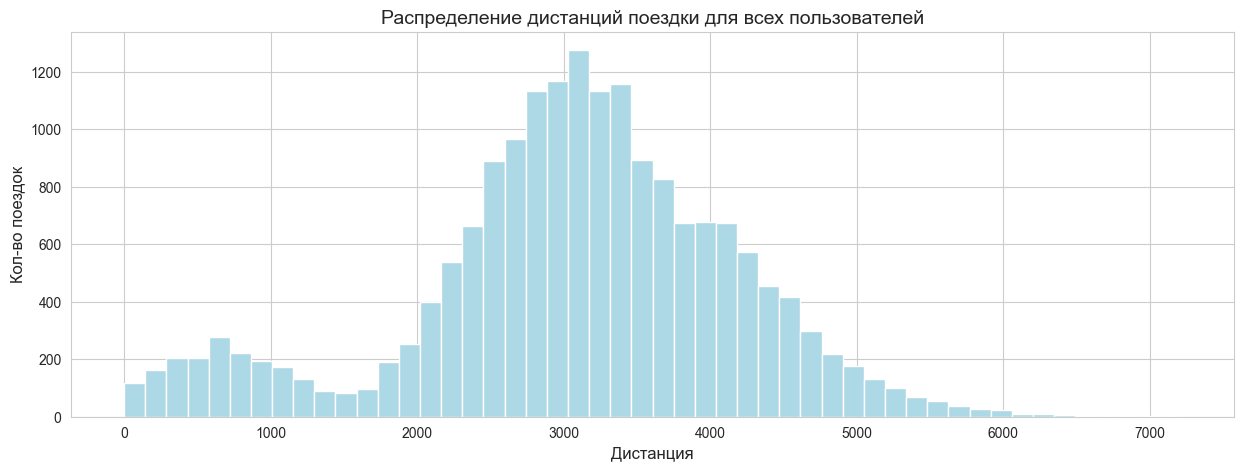

In [73]:
df_ride['distance'].hist(bins=50, figsize=(15,5), color='lightblue')
plt.title('Распределение дистанций поездки для всех пользователей', fontsize=14)
plt.xlabel('Дистанция', fontsize=12)
plt.ylabel('Кол-во поездок', fontsize=12)
plt.show()

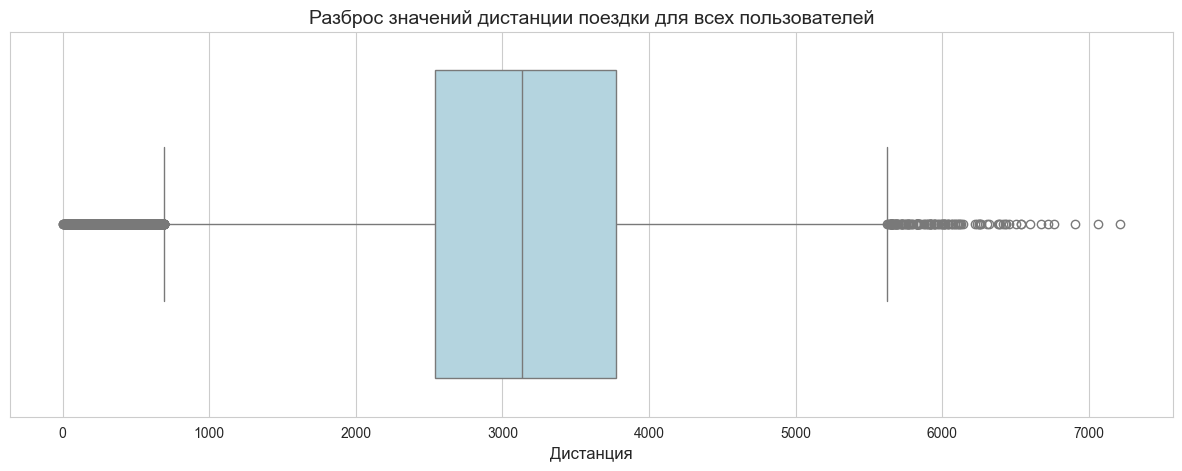

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_ride['distance'], orient='h', color='lightblue')
plt.title('Разброс значений дистанции поездки для всех пользователей', fontsize=14)
plt.xlabel('Дистанция', fontsize=12)
plt.show()

Из построенных графиков видно , что самой популярной дистанцией поездки у клиентов является диапазон между **2500** и **3700** метров, так же интересом пользуються более короткие дестанции от **100** до **1300** метров. В остальном данные распределны нормально без каких либо сильных аномалий.

Для полноты анализа рассмотрим так же процентный и количественный график агрегированных по километрам значений.

C:\Users\para\AppData\Local\Temp\ipykernel_26448\1524534209.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ride.groupby('dist_group').size().plot(kind='pie',autopct='%1.1f%%',
C:\Users\para\AppData\Local\Temp\ipykernel_26448\1524534209.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ride.groupby('dist_group').size().plot(kind='bar', ax=ax[1],


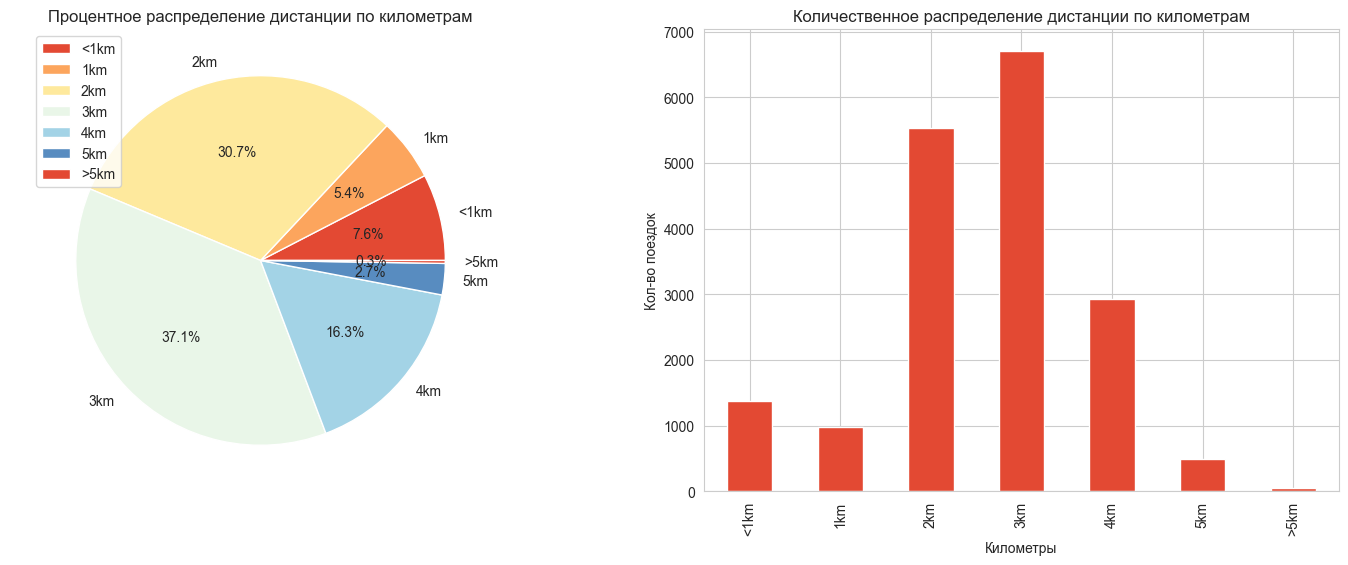

In [75]:
df_ride['dist_group'] = pd.cut(df_ride['distance'], bins=[0,1000,2000,3000,4000,5000,6000,8000],
                                   labels=['<1km', '1km', '2km', '3km', '4km', '5km', '>5km'], 
                                   right=False)
fig, ax = plt.subplots(1,2, figsize=(18,6))

df_ride.groupby('dist_group').size().plot(kind='pie',autopct='%1.1f%%', 
                                          ax=ax[0], title = 'Процентное распределение дистанции по километрам',
                                         ylabel=' ', legend=True)
df_ride.groupby('dist_group').size().plot(kind='bar', ax=ax[1], 
                                          title='Количественное распределение дистанции по километрам',
                                         xlabel='Километры', ylabel='Кол-во поездок')
plt.show()

**Из проведенного анализа дистанций на которые в среднем ездят клиенты сервиса можно сделать следующий вывод:**

- Большим спросом пользуются поездки на средние дистанции **2,3,4** км которые составляют (**84.1%**) всех наших данных. Электросамокаты идеально подходят для таких расстояний, так как они быстрее пешеходного перемещения и удобнее общественного транспорта на коротких дистанциях и при их использовании легко избежать пробок.


- Так же клиенты проявляют интерес к проездкам на малые дистанции такие как **<1km и 1km**. Такой интерес вызван тем что на электросамокате легко добирать от метро или же остановки общественного транспорта до дома или офиса.


- Дистанции **5 км и более** привлекли меньше всего внимания со стороны клиентов (всего **3%** всех поездок. Это может быть связано с ограничениями батареи, усталостью пользователей или неблагоприятными для поездки на длинные расстояния погодными условиями.


### Анализ продолжительности поездок.

Теперь проведем анализ средних значений длительности поездки на электросамокате при использовании нашего сервиса.

In [76]:
df_ride['duration'].describe().to_frame()

,duration
count,18068.000000
mean,17.805017
std,6.091071
min,0.500000
25%,13.600000
50%,17.680000
75%,21.722500
max,40.820000


Из таблицы видно что средняя длительность поездки для всех пользователей равна **17** минут.

Для более детального разбора значений длительности поездки , рассмотрим гистограмму.

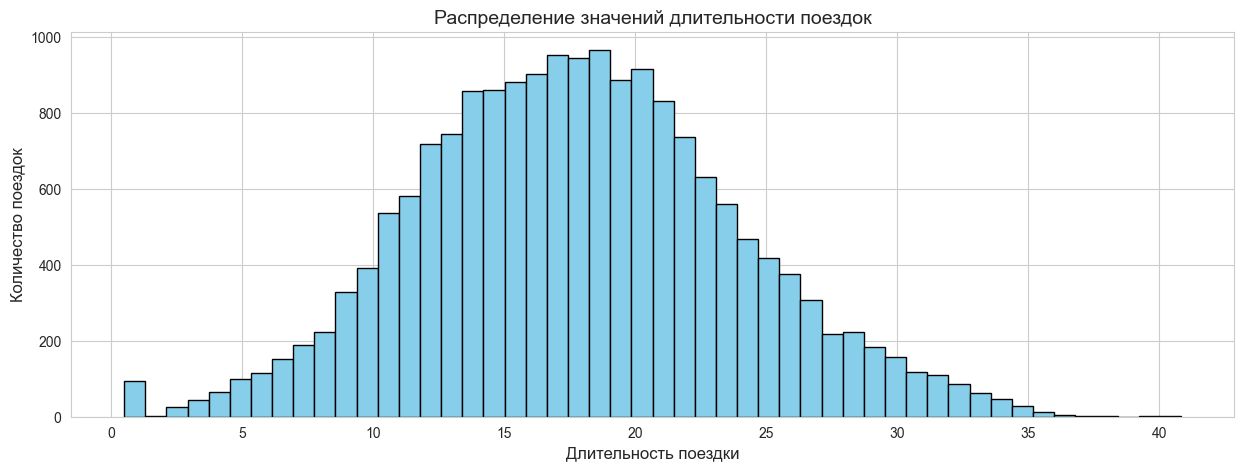

In [77]:
plt.figure(figsize=(15, 5))
df_ride['duration'].hist(bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Длительность поездки', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.title('Распределение значений длительности поездок', fontsize=14)
plt.show()

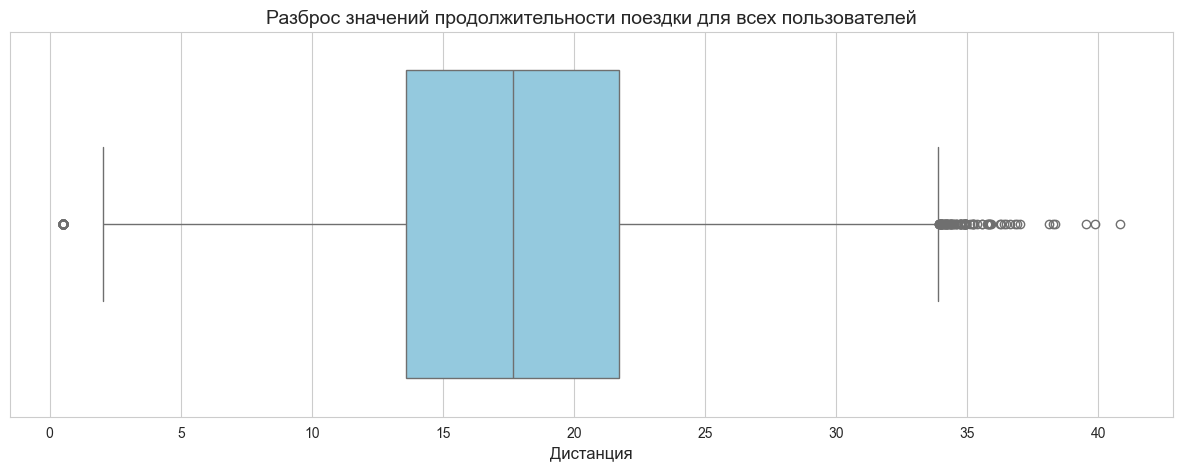

In [78]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_ride['duration'], orient='h', color='skyblue')
plt.title('Разброс значений продолжительности поездки для всех пользователей', fontsize=14)
plt.xlabel('Дистанция', fontsize=12)
plt.show()

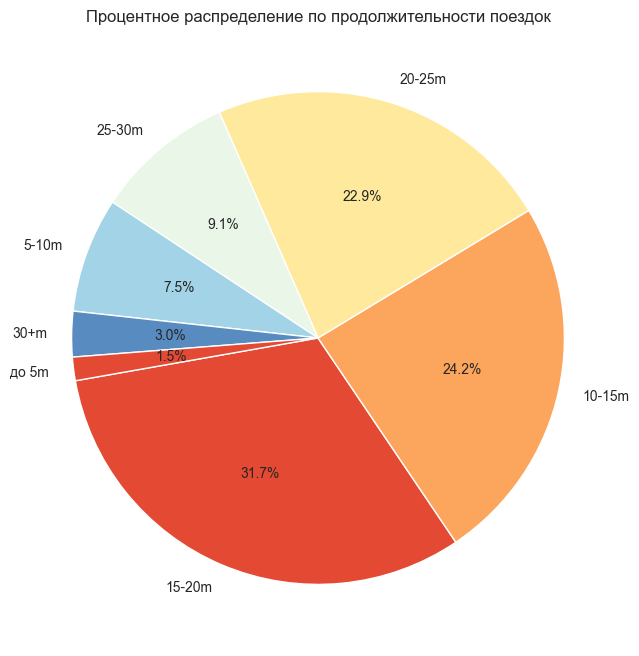

In [79]:
df_ride['dur_agr'] = pd.cut(df_ride['duration'], bins=[0, 5, 10, 15, 20, 25, 30, 40], 
                labels=['до 5m', '5-10m', '10-15m', '15-20m', '20-25m', '25-30m', '30+m'])

# Строим круговую диаграмму
df_ride['dur_agr'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=190, figsize=(8,8))
plt.ylabel('') 
plt.title('Процентное распределение по продолжительности поездок')
plt.show()

In [80]:
ride_mean = df_ride[df_ride['duration'] > 0.5].pivot_table(
    index='dur_agr', values='distance', aggfunc=['mean', 'median']).reset_index()
ride_mean.columns = ['Дистанция', 'Средняя дистанция', 'Медианная дистанция']
ride_mean

C:\Users\para\AppData\Local\Temp\ipykernel_26448\3611621484.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ride_mean = df_ride[df_ride['duration'] > 0.5].pivot_table(
C:\Users\para\AppData\Local\Temp\ipykernel_26448\3611621484.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ride_mean = df_ride[df_ride['duration'] > 0.5].pivot_table(


,Дистанция,Средняя дистанция,Медианная дистанция
0,до 5m,420.197432,393.700
1,5-10m,1525.429633,1335.905
2,10-15m,2669.029106,2814.670
3,15-20m,3121.073492,3099.190
4,20-25m,3535.831441,3441.260
5,25-30m,3864.220406,3783.345
6,30+m,4239.335492,4174.230


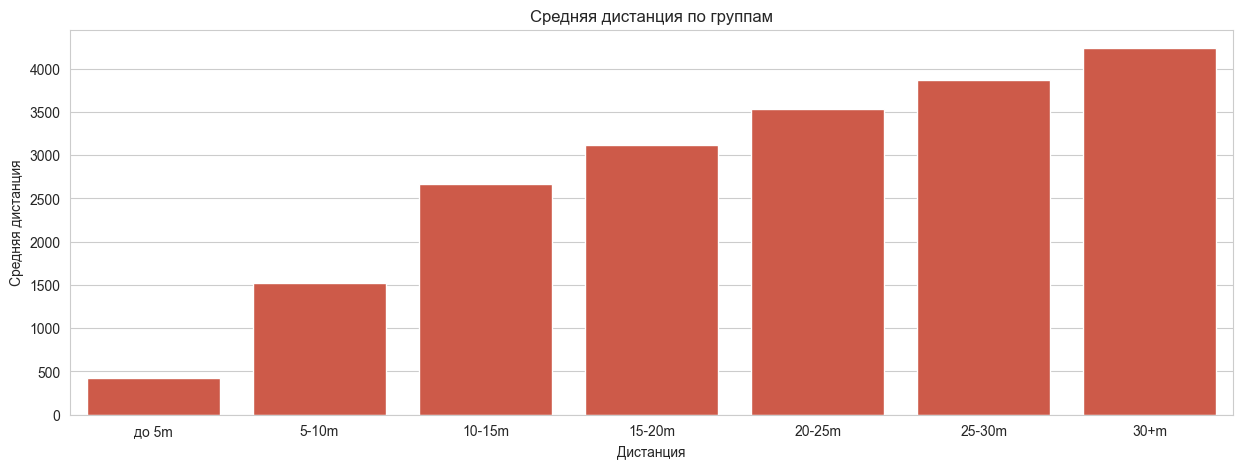

In [81]:
plt.figure(figsize=(15,5))
sns.barplot(x='Дистанция', y='Средняя дистанция', data=ride_mean)
plt.title('Средняя дистанция по группам')
plt.show()

Из агрегированного графика видна прямая зависимость расстояния от времени аренды самоката , что вполне логично.

На графиках так же удалось обнаружить подозрительные значения с длительностью поездки в **0.5** минут. Изучим их подробней.


In [82]:
df_ride[df_ride['duration'] <= 1]

,user_id,distance,duration,date,month,dist_group,dur_agr
6531,701,4196.45,0.5,2021-08-31,8,4km,до 5m
6570,704,4830.82,0.5,2021-10-14,10,4km,до 5m
6680,712,4684.00,0.5,2021-03-04,3,4km,до 5m
6695,713,5215.64,0.5,2021-02-25,2,5km,до 5m
6768,718,5197.44,0.5,2021-02-11,2,5km,до 5m
6860,724,6225.52,0.5,2021-12-16,12,>5km,до 5m
6883,726,4452.49,0.5,2021-03-01,3,4km,до 5m
7018,735,4406.95,0.5,2021-04-13,4,4km,до 5m
7160,745,5286.17,0.5,2021-08-17,8,5km,до 5m
7364,760,4881.39,0.5,2021-08-29,8,4km,до 5m


Обнаружилась ошибка в данных , а именно в столбце `duration` вне зависимости от расстояния значения этой переменной принимают значения **0.5** минут. Оценим количество ошибок относительно всего набора данных `df_ride`

In [83]:
print('Количество подозрительных значений :', len(df_ride[df_ride['duration'] <= 1]))
print('Общее количество данных :', len(df_ride))
print('Доля подозрительных значений :', round(len(df_ride[df_ride['duration'] <= 1]) / len(df_ride), 3)*100,'%')

Количество подозрительных значений : 95
Общее количество данных : 18068
Доля подозрительных значений : 0.5 %


Доля дефективных значений составила всего **0.5%** от всего обьемы данных и не сможет их сильно исказить , оставим их как есть что бы не лишаться других важных для нас значений.

**Посмотрим на то есть ли какая либо корреляция между месяцем и продолжительностью поездки.**

In [84]:
month_dur = df_ride.pivot_table(index='month', values='duration', aggfunc=('mean', 'count', 'median')).reset_index()
month_dur.columns = ['Месяц', 'Кол-во наблюдений', 'Среднее расстояние', 'Медианное расстояние']
month_dur

,Месяц,Кол-во наблюдений,Среднее расстояние,Медианное расстояние
0,1,1585,17.840726,17.780
1,2,1336,17.714364,17.485
2,3,1544,17.569275,17.650
3,4,1506,17.901315,17.810
4,5,1560,18.035237,17.750
5,6,1553,17.925396,17.740
6,7,1529,17.910713,17.800
7,8,1518,17.694427,17.750
8,9,1517,17.783355,17.510
9,10,1475,17.633173,17.580


Как видно из таблицы , какой либо значительной разницы в пройдённом пользователями расстоянии в зависимости от месяца обнаружить **не удалось**.

**Проведя анализ продолжительности поездок мы пришли в следующим выводам:**

- За исключением аномалии в столбце `duration` которые принимали значения в **0.5** минут , данные распределились нормально , без каких либо резких выбросов


- Среднее время поездки расположилось в диапозоне от **13** до **23** минут.


- Так же удалось зафиксировать корреляцию между временем аренды и пройденым расстоянием.


- Каких либо различий в поведении клиентов в зависимости от города , выявить не удалось.

### Вывод

- При анализе городов в которых работает сервис аренды удалось выяснить , что в курортных городах популярность сервиса **GoFast** чем в крупных мегаполисах.


- При рассмотрении используемых типов подписки удалось заметить , что преобладающие количество клиентов используют тарифный план **free** (**54,4%**)


- Так же при анализе удалось выявить целевую возрастную группу пользователей сервиса , которая заняла диапазон от **19** до **30** лет , клиенты в остальных возрастных сегментах значительно реже пользуются услугами проката электросамокатов.


- При исследовании расстояния преодолённого пользователями , удалось определить две целевых группы это дистанции от **2500** до **3700** и от **100** до **1300**.


- Во время исследования продолжительности поездок , удалось установить основной временной промежуток от **13** до **23** минут в котором выполнялась большая часть всех поездок


## Объединение данных.

Для выполнения всех целей исследования потребуеться обьеденить все наши наборы данных.

### Создание единого датафрейма на основе полученных данных.

In [85]:
df = df_user.merge(df_ride, on='user_id', how='right')
df = df.merge(df_sub, on='subscription_type', how='left')
df.head(5)

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month,dist_group,dur_agr,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,19-25,4409.92,25.60,2021-01-01,1,4km,25-30m,6,0,199
1,1,Кира,22,Тюмень,ultra,19-25,2617.59,15.82,2021-01-18,1,2km,15-20m,6,0,199
2,1,Кира,22,Тюмень,ultra,19-25,754.16,6.23,2021-04-20,4,<1km,5-10m,6,0,199
3,1,Кира,22,Тюмень,ultra,19-25,2694.78,18.51,2021-08-11,8,2km,15-20m,6,0,199
4,1,Кира,22,Тюмень,ultra,19-25,4028.69,26.27,2021-08-28,8,4km,25-30m,6,0,199


In [86]:
len(df) , len(df_ride)

(18068, 18068)

После объединения , размер нашего главного набора данных `df` полностью соответствует самому большому набору входных данных `df_ride`, значит отъединение прошло успешно.

### Создание наборов данных по типу подписки.

**Создадим датафрейм с поездками на тарифе *ultra***

In [87]:
df_prem = df[df['subscription_type'] == 'ultra']
len(df_prem)

6500

**Создадим датафрейм с поездками без подписки**

In [88]:
df_np = df[df['subscription_type'] == 'free']
len(df_np)

11568

In [89]:
len(df_prem) + len(df_np) == len(df)

True

Выполнив проверку размерности , видим сумма двух наших датафреймов `df_prem` и `df_np` полностью совпадают , а значит никакие данные не были потеряны.

### Анализ данных на основании типа подписки

**Анализ расстояния в зависимости от использованого типа подписки**.

Сравним данные и попытаемся дать ответ на вопрос влияет ли тип подписки на затраченное на поездку время и пройденное расстояние.

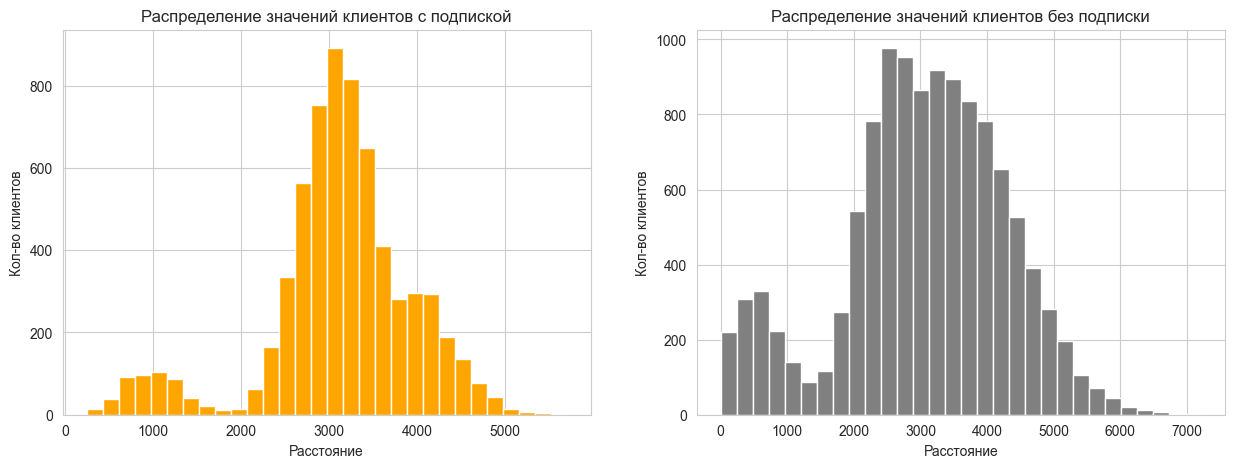

In [90]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_prem['distance'].hist(bins=30, ax=ax[0], color='orange')
ax[0].set_title('Распределение значений клиентов с подпиской')
ax[0].set_xlabel('Расстояние')
ax[0].set_ylabel('Кол-во клиентов')

df_np['distance'].hist(bins=30, ax=ax[1], color='grey')
ax[1].set_title('Распределение значений клиентов без подписки')
ax[1].set_xlabel('Расстояние')
ax[1].set_ylabel('Кол-во клиентов')
plt.show()

Для наглядности построим график с агрегированными значениями по километрам.

**Агрегированные значения**

C:\Users\para\AppData\Local\Temp\ipykernel_26448\1817374911.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prem.groupby('dist_group').size().plot(kind='bar', ax=ax[0], color='orange')
C:\Users\para\AppData\Local\Temp\ipykernel_26448\1817374911.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_np.groupby('dist_group').size().plot(kind='bar', ax=ax[1], color='grey')


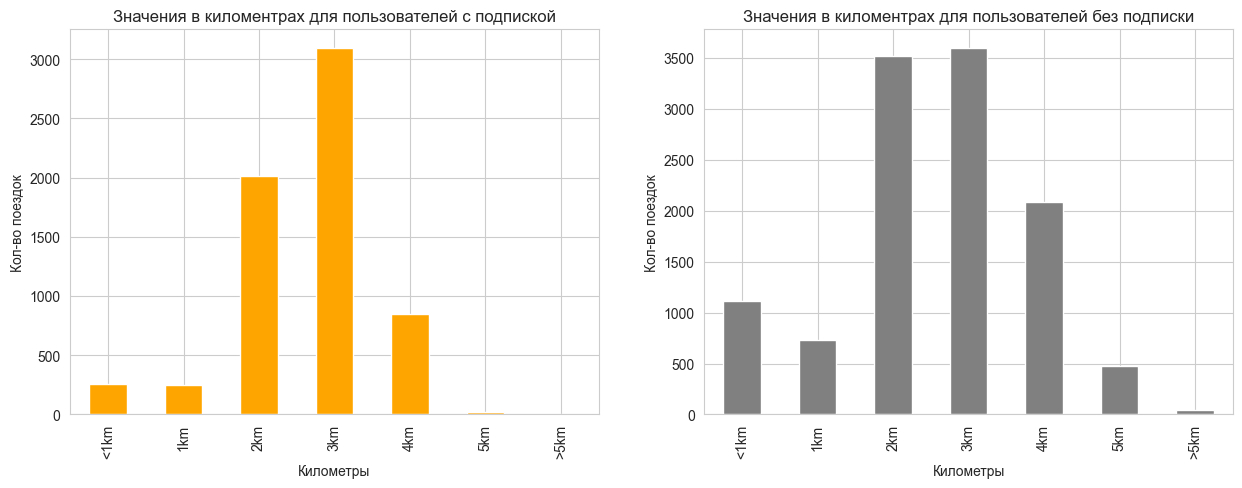

C:\Users\para\AppData\Local\Temp\ipykernel_26448\1817374911.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prem.groupby('dist_group').size().plot(kind='bar', position=0, width=0.3,
C:\Users\para\AppData\Local\Temp\ipykernel_26448\1817374911.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_np.groupby('dist_group').size().plot(kind='bar', position=1, width=0.3,


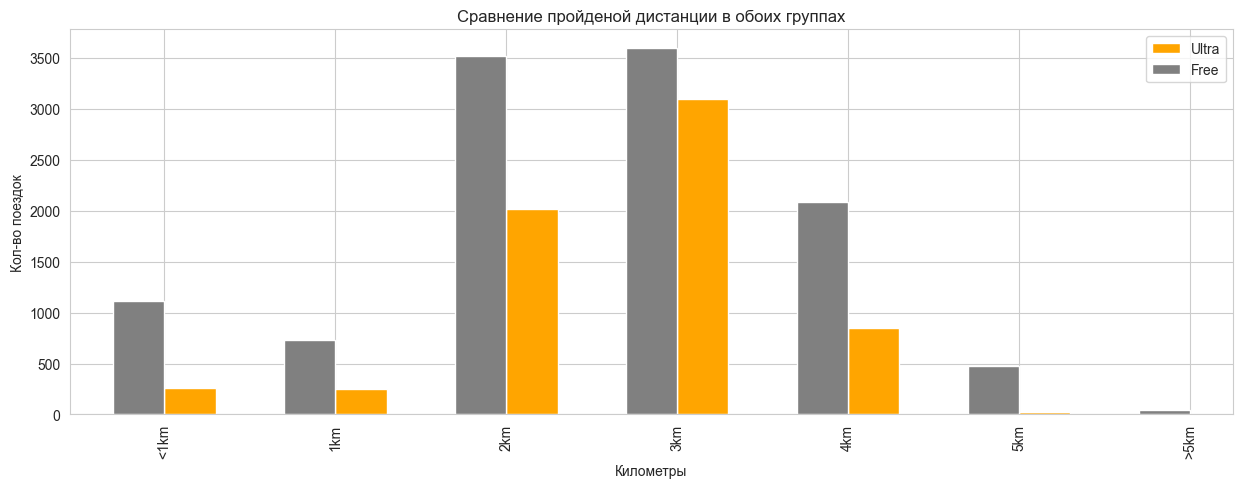

In [91]:
# первый график
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_prem.groupby('dist_group').size().plot(kind='bar', ax=ax[0], color='orange')
df_np.groupby('dist_group').size().plot(kind='bar', ax=ax[1], color='grey')
ax[0].set_title('Значения в киломентрах для пользователей с подпиской')
ax[1].set_title('Значения в киломентрах для пользователей без подписки')
ax[0].set_xlabel('Километры')
ax[1].set_xlabel('Километры')
ax[0].set_ylabel('Кол-во поездок')
ax[1].set_ylabel('Кол-во поездок')
plt.show()

# второй график
fig, ax = plt.subplots(figsize=(15,5))
df_prem.groupby('dist_group').size().plot(kind='bar', position=0, width=0.3, 
                                          title='С премиум подпиской', label='Ultra', color='orange')
df_np.groupby('dist_group').size().plot(kind='bar', position=1, width=0.3, 
                                        title='Без подписки', label='Free', color='grey')
ax.set_title('Сравнение пройденой дистанции в обоих группах')
ax.set_xlabel('Километры')
ax.set_ylabel('Кол-во поездок')
ax.legend()
plt.show()

C:\Users\para\AppData\Local\Temp\ipykernel_26448\1917768930.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prem_counts = df_prem.groupby('dist_group').size() / len(df_prem)
C:\Users\para\AppData\Local\Temp\ipykernel_26448\1917768930.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  np_counts = df_np.groupby('dist_group').size() / len(df_np)


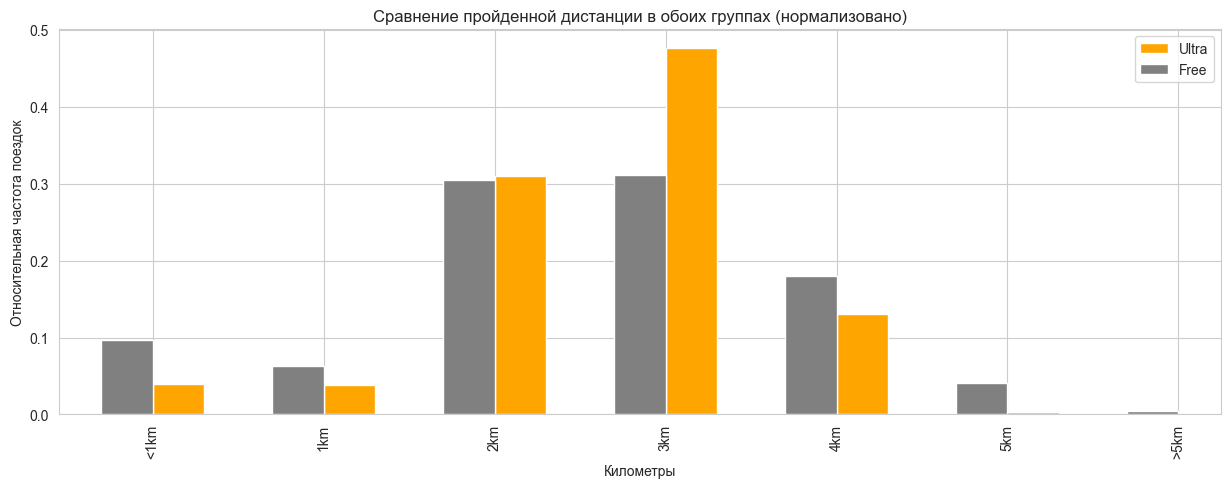

In [92]:
#нормализация данных
prem_counts = df_prem.groupby('dist_group').size() / len(df_prem)
np_counts = df_np.groupby('dist_group').size() / len(df_np)

#график
fig, ax = plt.subplots(figsize=(15, 5))
prem_counts.plot(kind='bar', position=0, width=0.3, 
                 title='С премиум подпиской', label='Ultra', color='orange', ax=ax)
np_counts.plot(kind='bar', position=1, width=0.3, 
                title='Без подписки', label='Free', color='grey', ax=ax)

ax.set_title('Сравнение пройденной дистанции в обоих группах (нормализовано)')
ax.set_xlabel('Километры')
ax.set_ylabel('Относительная частота поездок')
ax.legend()
plt.show()

**На основании блока исследования миожно сделать следующие предположения:**

- Учитывая разное количество данных в выборках , можно сделать вывод что клиенты с подпиской `ultra` и `free` чаще всего используют самокаты для передвижения на средние расстояния от **2** до **3** км , но в то время  пользователи подписки `free` чаще используют аренду самоката для передвижения на более короткие дистанции от **100** до **1300** метров. Так же видно что клиенты тарифа `ultra` в основном используют самокаты для передвижения на дистанцию **3 -4** км , что делает этот тариф приоритетным выбором для постоянных поездок на это расстояние.

**Помесячный анализ преодаленной дистанции**

Проанализируем данные по месяцам , в попытке выявить месяца с повышенным спросом на услуги сервиса.

In [93]:
df_mth = df_prem.pivot_table(index='month', values='distance', aggfunc=['mean', 'median', 'count']).reset_index()
df_mth.columns=['месяц', 'средняя дистанция', 'медианное расстояние', 'кол-во наблюдений']
df_mth

,месяц,средняя дистанция,медианное расстояние,кол-во наблюдений
0,1,3077.324726,3135.445,584
1,2,3100.771966,3159.340,468
2,3,3128.239626,3155.140,561
3,4,3111.738276,3114.320,551
4,5,3125.528526,3150.300,597
5,6,3117.324690,3132.680,565
6,7,3150.998293,3201.380,574
7,8,3120.934463,3159.945,540
8,9,3081.551379,3141.970,515
9,10,3138.260038,3137.920,529


Помесячные данные практически равны между собой. Никакой зависимости между месяцем и пройдённой за это время дистанцией установить не удалось.

**Анализ среднего расстояния по городам**

Посмотрим на средние расстояния по городам , возможно упасться выявить какую либо закономерность.

In [94]:
df_prem.pivot_table(index='city', values='distance', aggfunc='mean').T

city,Екатеринбург,Краснодар,Москва,Омск,Пятигорск,Ростов-на-Дону,Сочи,Тюмень
distance,3126.637831,3099.439205,3128.057429,3124.623192,3132.667312,3050.948305,3139.522706,3127.302008


Как и в случае с помесячным анализом , данные приняли практически идентичный вид , что не позволяет сделать нам какие либо выводы.

**Анализ времени поездок относительно типа подписки**

Посмотрим на время поездки клиентов с разным типом подписки , возможно это окажет влияние на арендное время.

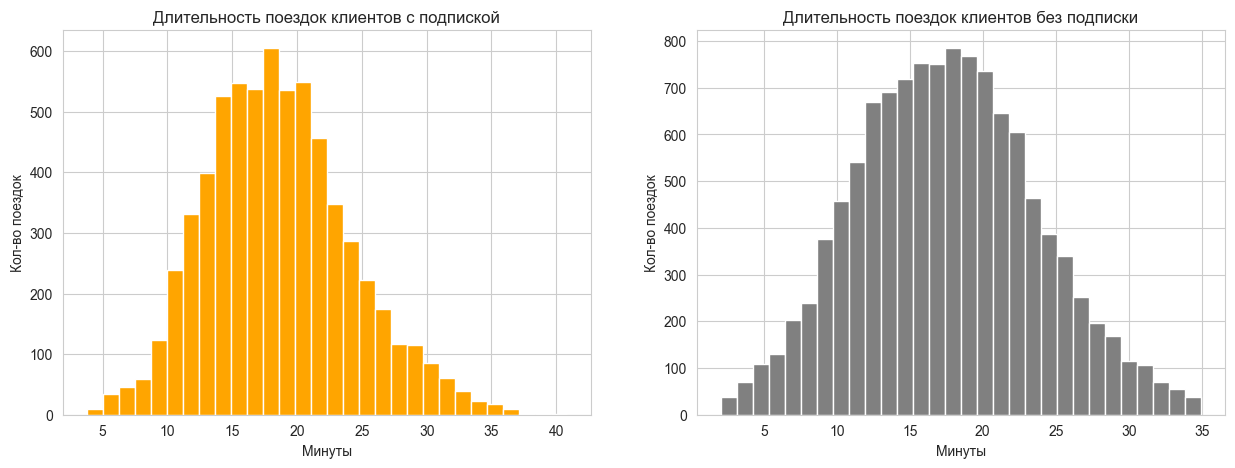

In [95]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_prem['duration'].hist(bins=30, ax=ax[0], color='orange')
ax[0].set_title('Длительность поездок клиентов с подпиской')
ax[1].set_title('Длительность поездок клиентов без подписки')
ax[0].set_xlabel('Минуты')
ax[1].set_xlabel('Минуты')
ax[0].set_ylabel('Кол-во поездок')
ax[1].set_ylabel('Кол-во поездок')
df_np[df_np['duration'] > 0.5]['duration'].hist(bins=30, ax=ax[1], color='grey')
plt.show()

Из графиков какой либо сильной разницей между клиентами устновить не удалось , выведем свобдную таблицу по типам подписки что бы в этом убедиться.

In [96]:
df_subc = df.pivot_table(index='subscription_type', 
                         values=['duration', 'distance'], 
                         aggfunc=['mean', 'median', 'count'],
                        ).reset_index()
df_subc
df_subc.columns = (['тип подписки', 'средняя дистанция', 
                    'средняя длительность', 'медианная дистанция', 
                    'медианная длительность', 'кол-во наблюдений',  'del'])
df_subc = df_subc.drop('del', axis=1)
df_subc

,тип подписки,средняя дистанция,средняя длительность,медианная дистанция,медианная длительность,кол-во наблюдений
0,free,3045.495284,17.390900,3114.65,17.33,11568
1,ultra,3115.445431,18.542017,3148.64,18.18,6500


За исключением количества наблюдений , данные по другим переменным имеют не значительную разницу для того что бы сделать какие либо выводы или предположения.

**Анализ времени поездки по городам и месяцам**

Возможно упасться отыскать какую либо зависимость если проанализировать значения времени поездки в разрезе месяца и города.

In [97]:
df_time = df.pivot_table(index='month', columns ='subscription_type',
                         values='duration', aggfunc=['mean', 'count']).reset_index()

df_time.columns = (['месяц', 'средняя длительность free', 'средняя длительность ultra',
                    'кол-во значений free', 'кол-во значений ultra'])
df_time

,месяц,средняя длительность free,средняя длительность ultra,кол-во значений free,кол-во значений ultra
0,1,17.464635,18.485360,1001,584
1,2,17.145449,18.769530,868,468
2,3,17.067304,18.448841,983,561
3,4,17.535340,18.535626,955,551
4,5,17.641973,18.669598,963,597
5,6,17.552217,18.577965,988,565
6,7,17.486712,18.616150,955,574
7,8,17.153793,18.673574,978,540
8,9,17.414890,18.500252,1002,515
9,10,17.212188,18.386011,946,529


Посмотрим на распределение среднего времени поездки по городам.

In [98]:
df_city = df.pivot_table(index='city', columns ='subscription_type',
                         values='duration', aggfunc=['mean', 'count']).reset_index()

df_city.columns = (['город', 'средняя длительность free', 'средняя длительность ultra',
                    'кол-во значений free', 'кол-во значений ultra'])
df_city
#df_np.pivot_table(index='city', values='duration', aggfunc=['mean', 'count'])

,город,средняя длительность free,средняя длительность ultra,кол-во значений free,кол-во значений ultra
0,Екатеринбург,17.491539,18.417523,1585,876
1,Краснодар,17.408113,18.361397,1521,780
2,Москва,17.508221,18.897557,1175,700
3,Омск,17.225368,18.478283,1250,827
4,Пятигорск,17.558236,18.582077,1672,852
5,Ростов-на-Дону,17.192703,18.317955,1565,885
6,Сочи,17.240685,18.553715,1446,813
7,Тюмень,17.487629,18.813755,1354,767


За исключением того что клиенты с тарифом `ultra` тратят в среднем больше времени на поездки , выявить других закономерностей не удалось.

### Вывод

**В этом блоке исследования нами была проделана следующая работа :**


- Мы провели объединение наших входных данных в один датафрейм `df` , а так же для блока с проверкой гипотез для отдела маркетинга сделали два датафрейма по типу подписки `df_prem` для пользователей **ultra** и `df_np` для пользователей тарифа **free**.


- Была выполнена визуализация и анализ классическими средствами двух датафреймой `df_prem` и `df_np` содержащих информацию о клиентах с рахным типом тарифных планов. Удалось установить, что клиенты тарифа `free` чаще используют самокаты для передвижения на короткие дистанции в свою очередь пользователи тарифа `ultra` отдают предпочтение передвижению на средние дистанции. Более подробно с разницей в поведении пользователей с разным типом подписки ознакомимся в блоке проверки гипотез.


## Подсчёт выручки

Расчитаем финансовые показатели для клиентов с разным типом подписки.

In [99]:
df['duration'] = np.ceil(df['duration']) 
df_profit = df.pivot_table(index=['user_id', 'name', 'month', 'subscription_type'
                                 ], values=['duration', 'distance'], aggfunc=['sum', 'count'])
df_profit = df_profit.reset_index()
df_profit.columns = ['user_id','name', 'month', 'sub_type', 'distance', 'duration', 'count', 'del']
df_profit.drop(columns=['del'], inplace=True)

df_profit.head(5)

,user_id,name,month,sub_type,distance,duration,count
0,1,Кира,1,ultra,7027.51,42.0,2
1,1,Кира,4,ultra,754.16,7.0,1
2,1,Кира,8,ultra,6723.47,46.0,2
3,1,Кира,10,ultra,5809.91,32.0,2
4,1,Кира,11,ultra,7003.50,56.0,3


In [100]:
def profit(row):
    if row['sub_type'] == 'ultra':
        return row['duration'] * 6 + 199
    else:
        return (50 * row['count']) + (row['duration'] * 8)

df_profit['profit_per_month'] = df_profit.apply(profit, axis=1)    
df_profit.head(10)

,user_id,name,month,sub_type,distance,duration,count,profit_per_month
0,1,Кира,1,ultra,7027.51,42.0,2,451.0
1,1,Кира,4,ultra,754.16,7.0,1,241.0
2,1,Кира,8,ultra,6723.47,46.0,2,475.0
3,1,Кира,10,ultra,5809.91,32.0,2,391.0
4,1,Кира,11,ultra,7003.50,56.0,3,535.0
5,1,Кира,12,ultra,6751.63,28.0,2,367.0
6,2,Станислав,3,ultra,10187.73,63.0,3,577.0
7,2,Станислав,4,ultra,6164.39,40.0,2,439.0
8,2,Станислав,6,ultra,3255.34,14.0,1,283.0
9,2,Станислав,7,ultra,6780.73,48.0,2,487.0


Мы создали новый датафрейм `df_profit` который содержит интересующие нас сводные данные из датафрейма `df` и добавили в него столбец `profit_per_month` содержащий информацию о прибыли принесенной за месяц. Для получения данных о выручке мы использовали следующую формулу *стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.*

Посмотри как распределилась общая выручка и посмотрим на ее распределение по месяцам.

,тип подписки,суммарная прибыль за весь период
0,free,2233656.0
1,ultra,1644237.0


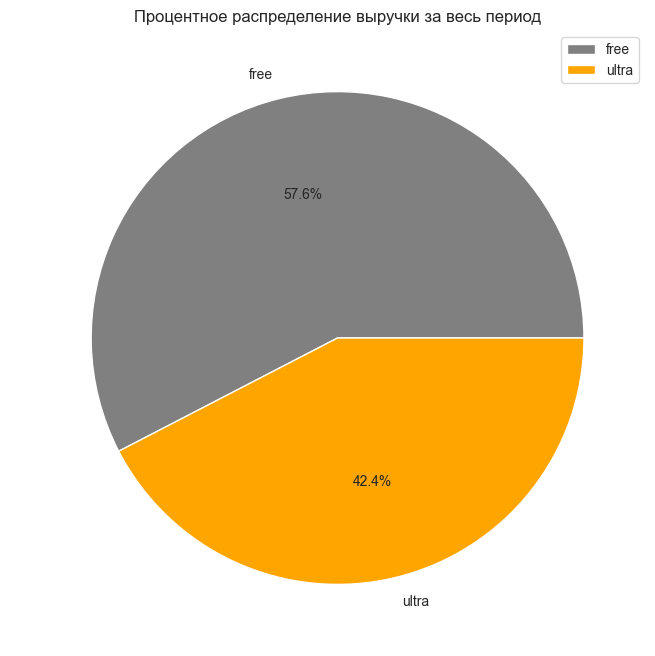

In [101]:
total_inc = df_profit.pivot_table(index='sub_type', values='profit_per_month', aggfunc='sum').reset_index()
total_inc.columns = ['тип подписки', 'суммарная прибыль за весь период']
display(total_inc)
total_inc.plot(kind='pie', labels=total_inc['тип подписки'], 
               y='суммарная прибыль за весь период', autopct='%1.1f%%', colors=['grey', 'orange'], figsize=(8,8))
plt.title('Процентное распределение выручки за весь период')
plt.ylabel(' ')
plt.show()

Посмотрим на среднюю прибыль по типам подписки.

,тип подписки,средняя прибыль за весь период
0,free,328.575463
1,ultra,362.726009


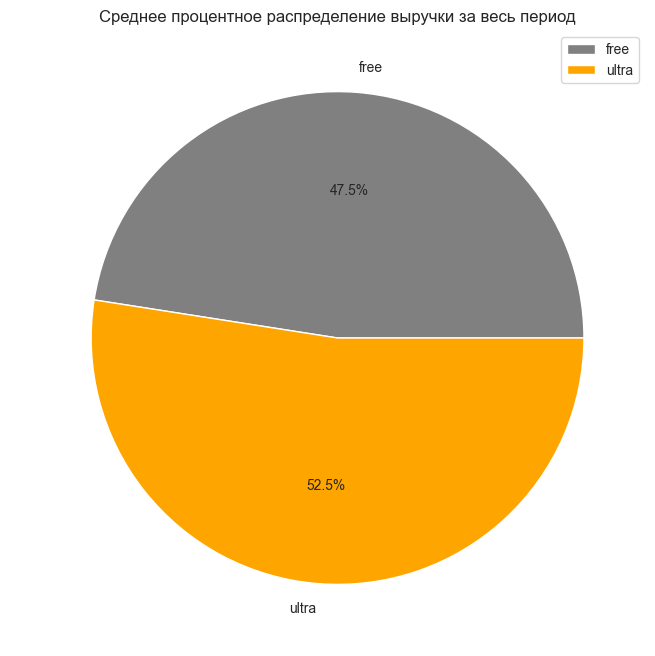

In [102]:
mean_inc = df_profit.pivot_table(index='sub_type', values='profit_per_month', aggfunc='mean').reset_index()
mean_inc.columns = ['тип подписки', 'средняя прибыль за весь период']
display(mean_inc)
mean_inc.plot(kind='pie', labels=mean_inc['тип подписки'], 
               y='средняя прибыль за весь период', autopct='%1.1f%%', colors=['grey', 'orange'], figsize=(8,8))
plt.title('Cреднее процентное распределение выручки за весь период')
plt.ylabel(' ')
plt.show()

,месяц,средняя прибыль за месяц
0,1,337894.0
1,2,290340.0
2,3,329776.0
3,4,322882.0
4,5,337191.0
5,6,335888.0
6,7,328432.0
7,8,325586.0
8,9,322993.0
9,10,315288.0


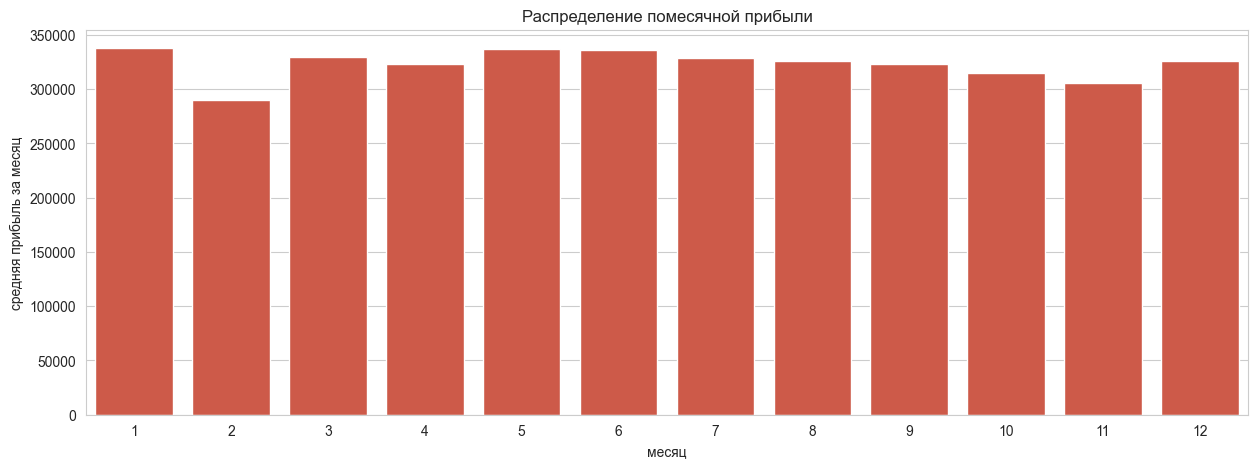

In [103]:
mon_prof = df_profit.pivot_table(index='month', values='profit_per_month', aggfunc='sum').reset_index()
mon_prof.columns =['месяц', 'средняя прибыль за месяц']
display(mon_prof)
plt.figure(figsize=(15,5))
sns.barplot(x='месяц', y='средняя прибыль за месяц', data=mon_prof)
plt.title('Распределение помесячной прибыли')
plt.show()

Мы видим что клиенты с типом подписки **free** приносят больше прибыли компании , чем клиенты с подпиской **ultra**. Как мы установили в блоках исследования выше , количество поездок по тарифу **free** почти в 2 раза превышает количество поездок по тарифу **ultra** что и повлияло на итоговую прибыль.

Посмотрим на помесячное распределение прибыли в зависимости от типа подписки.

In [104]:
df_subpr = df_profit.pivot_table(index=['month', 'sub_type'], values='profit_per_month', aggfunc='sum')
display(df_subpr)
df_subpr = df_subpr.reset_index()

profit_per_month
month sub_type                  
1     free              193810.0
      ultra             144084.0
2     free              165792.0
      ultra             124548.0
3     free              187198.0
      ultra             142578.0
4     free              185582.0
      ultra             137300.0
5     free              187998.0
      ultra             149193.0
6     free              192072.0
      ultra             143816.0
7     free              184990.0
      ultra             143442.0
8     free              187076.0
      ultra             138510.0
9     free              193668.0
      ultra             129325.0
10    free              181404.0
      ultra             133884.0
11    free              179036.0
      ultra             126528.0
12    free              195030.0
      ultra             131029.0

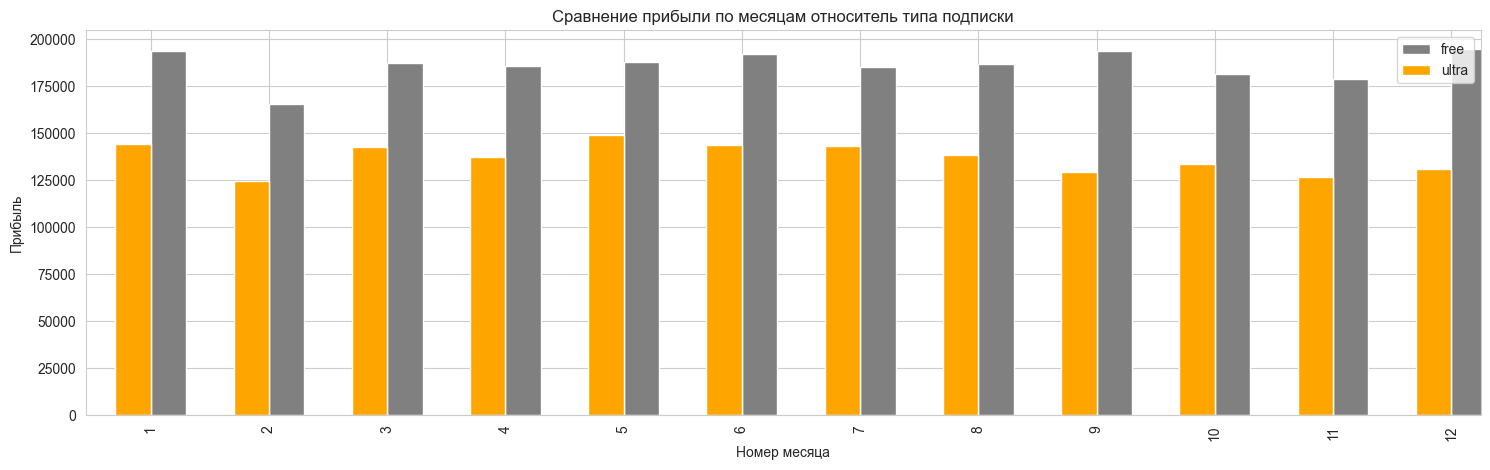

In [105]:
sub_free = df_subpr[df_subpr['sub_type'] == 'free']
sub_prem = df_subpr[df_subpr['sub_type'] == 'ultra']

fig, ax = plt.subplots(figsize=(18,5))
sub_free.plot(kind='bar', x='month', y='profit_per_month', color='grey', position=0, ax=ax, width=0.3, label='free')
sub_prem.plot(kind='bar', x='month', y='profit_per_month', color='orange', position=1, ax=ax, width=0.3, label='ultra')
ax.set_title('Сравнение прибыли по месяцам относитель типа подписки')
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Прибыль')
plt.show()

Какой либо сильной закономерности в полученой прибыли в зависимости от месяца и типа подписки установить **не удалось**.

### Вывод


- Мы создали сводный датафрейм `df_profit` куда добавили помесячную прибыль для каждого пользователя независимо от типа подписки , а так же создали два раздельных набора данных `df_prem` и `df_np` которые содержат информацию о клиентах с разными тарифными планами.


- Проанализировав данные о выручке , удалось установить что клиенты тарифа `free` приносят сервису больше прибыли относительно пользователей тарифа `ultra` . что объясняется большим количеством поездок. Но в тоже время клиенты с подпиской `ultra` более ценны для сервиса с позиции приносимой прибыли.


## Проверка гипотез для проведения рекламной компании.

### Тратят ли пользователи с подпиской больше времени на поездки?

**Для начала сформулируем нулевую и альтернытивную гипотезу.**

H_0 = **Пользователи с подпиской не тратят больше времени на поездки по сравнению с пользователями без подписки. (Среднее время поездки для подписчиков равно среднему времени поездки для неподписчиков.)**

H_1 = **Пользователи с подпиской тратят больше времени на поездки по сравнению с пользователями без подписки. (Среднее время поездки для подписчиков больше, чем среднее время поездки для неподписчиков.)**

In [106]:
alpha = 0.05
test_dual = st.ttest_ind(df_prem['duration'], df_np['duration'])
print('p-значение:', test_dual.pvalue)
if test_dual.pvalue < alpha :
     print('Отвергаем нулевую гипотезу')
else :
    print('Не отвергаем нулевую гипотезу') 

p-значение: 2.548277914302398e-34
Отвергаем нулевую гипотезу


Для получения дополнительных доказательств в пользу альтернативной гипотезы построим графики.

C:\Users\para\AppData\Local\Temp\ipykernel_26448\2805953331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subscription_type', y='duration', data=df, palette=['orange', 'grey'])
C:\Users\para\AppData\Local\Temp\ipykernel_26448\2805953331.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='subscription_type', y='duration',palette=['orange', 'grey'], data=df,ci='sd')
C:\Users\para\AppData\Local\Temp\ipykernel_26448\2805953331.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscription_type', y='duration',palette=['orange', 'grey'], data=df,ci='sd')


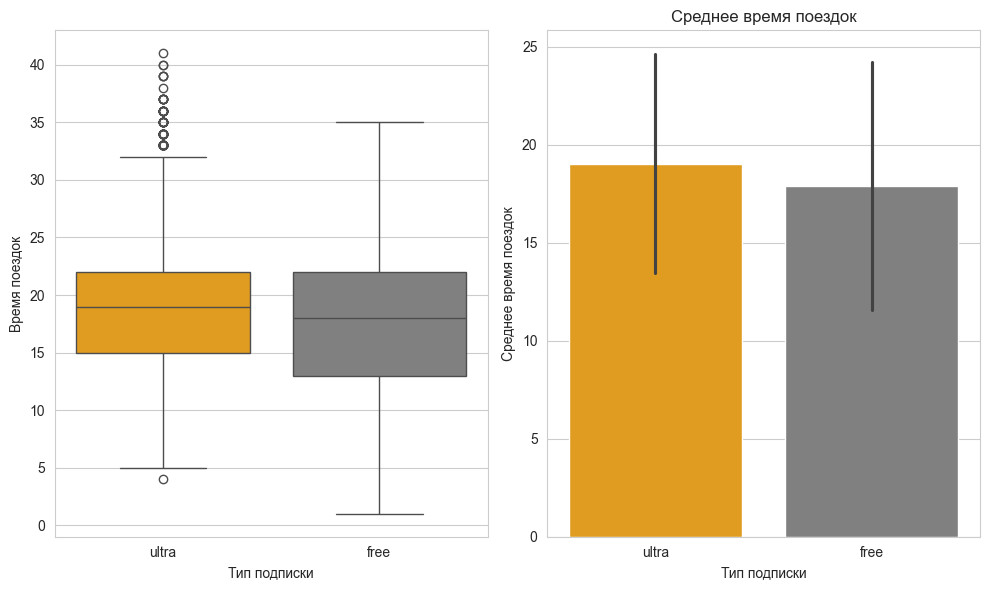

In [107]:
plt.figure(figsize=(10, 6))

# Первый график
plt.subplot(1, 2, 1)  
sns.boxplot(x='subscription_type', y='duration', data=df, palette=['orange', 'grey'])
plt.xlabel('Тип подписки')
plt.ylabel('Время поездок')

# Второй график
plt.subplot(1, 2, 2) 
sns.barplot(x='subscription_type', y='duration',palette=['orange', 'grey'], data=df,ci='sd')
plt.title('Среднее время поездок')
plt.xlabel('Тип подписки')
plt.ylabel('Среднее время поездок')

plt.tight_layout()
plt.show()

**Нулевая гипотеза не подтвердилась , пользователи с подпиской `ultra` тратят в среднем больше времени на поездки.**

### Поежают ли пользователи с премиум подпиской менее 3130м?

**Для начала сформулируем нулевую и альтернытивную гипотезу.**

H_0 = **Среднее расстояние поездки пользователей с подпиской равно 3130 метрам или больше.**

H_1 = **Среднее расстояние поездки пользователей с подпиской меньше 3130 метров.**

p-значение: 0.0804637394157586
Недостаточно доказательств для отклонения нулевой гипотезы


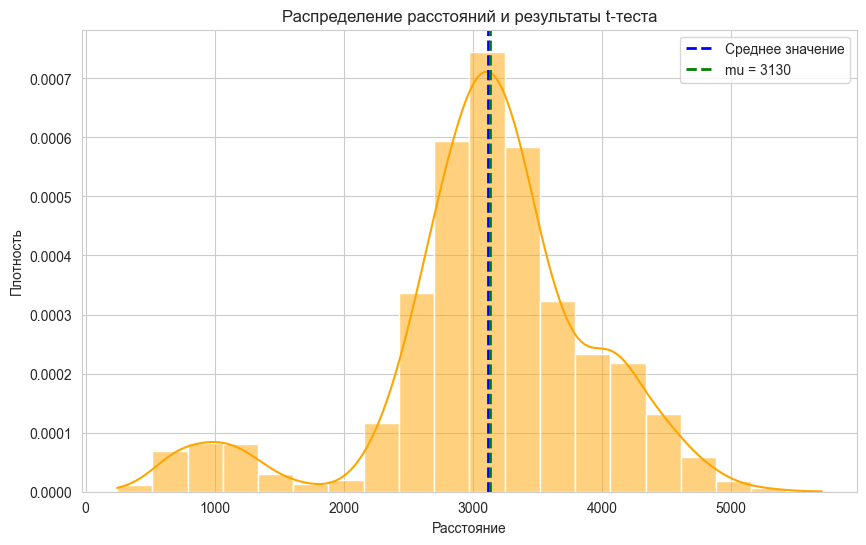

In [108]:
mu = 3130
alpha = 0.05
test_oneside = st.ttest_1samp(df_prem['distance'], mu, alternative='less')
print('p-значение:', test_oneside.pvalue)
if test_oneside.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else :
    print("Недостаточно доказательств для отклонения нулевой гипотезы")
    
plt.figure(figsize=(10, 6))

sns.histplot(df_prem['distance'], bins=20, kde=True, color='orange', stat='density')

plt.axvline(df_prem['distance'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Среднее значение')
plt.axvline(mu, color='green', linestyle='dashed', linewidth=2, label='mu = 3130')

plt.title('Распределение расстояний и результаты t-теста')
plt.xlabel('Расстояние')
plt.ylabel('Плотность')
plt.legend()
plt.show()

**Значения p-value не позволяют нам отвергнуть нулевую гипотезу , а значит среднее расстояние поездки пользователей с подпиской меньше 3130 метров.**

### Выручка от пользователей с подпиской выше чем у пользователей без ?

**Для начала сформулируем нулевую и альтернытивную гипотезу.**

H_0 = **Средняя выручка от пользователей с подпиской меньше или равна средней выручке от пользователей без подписки.**

H_1 = **Средняя выручка от пользователей с подпиской больше средней выручке от пользователей без подписки.**

In [109]:
df_prem_inc = df_profit[df_profit['sub_type'] == 'ultra']
df_np_inc = df_profit[df_profit['sub_type'] == 'free']
test_inc = st.ttest_ind(df_prem_inc['profit_per_month'], df_np_inc['profit_per_month'], alternative='greater')
print ('p-значение:', test_inc.pvalue)
if test_inc.pvalue < 0.05 :
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований не доверять нулевой гипотезе')

p-значение: 1.8164914860049706e-31
Отвергаем нулевую гипотезу


C:\Users\para\AppData\Local\Temp\ipykernel_26448\3547341177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sub_type', y='profit_per_month', data=df_profit, palette=['orange', 'grey'])


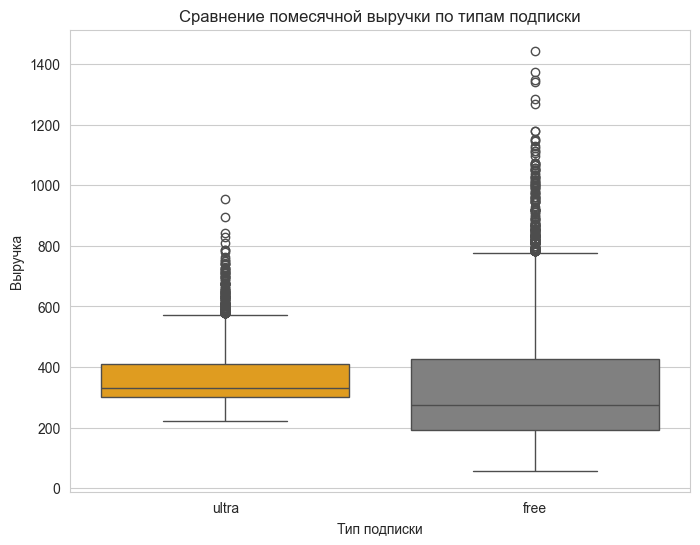

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sub_type', y='profit_per_month', data=df_profit, palette=['orange', 'grey'])
plt.title('Сравнение помесячной выручки по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Выручка')
plt.show()

**Проведенный тест позволяет нам отвергнуть нулевую гипотезу в пользу альтернативной, это говорит о том что средняя выручка от пользователей с подпиской больше средней выручке от пользователей без подписки.**

### Снизиться ли количество обращений в поддержку при обновлении серверов?

**Сформулируем нулевую и альтернативную гипотезы**

**Нулевая гипотеза (H0)** : Средняя разница равна нулю (обновление не повлияло на количество обращений).


**Альтернативная гипотеза (H1)** : Средняя разница меньше нуля (количество обращений снизилось).

У нас есть два измерения (до и после) для каждого пользователя, что делает данные зависимыми.
Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, можно использовать парный t-тест (paired t-test). Этот тест подходит, потому что у вас есть парные данные для каждого пользователя: количество обращений до и после обновления.

Как и в других тестах :

Если p-value меньше уровня значимости (например, 0.05), отвергаем нулевую гипотезу и делаем вывод, что количество обращений значимо снизилось.

Если p-value больше уровня значимости, недостаточно доказательств для отвержения нулевой гипотезы.

### Вывод
**При проверке поставленных гипотез удалось выяснить следующие :**

- В ходе провекрки гипотезы о том **Тратят ли пользователи с подпиской больше времени на поездки?** , данные теста говорят в пользу альтернативной гипотезы о том что **среднее время поездки для подписчиков больше, чем среднее время поездки для неподписчиков.**


- При проверке гипотезы о **Проежают ли пользователи с премиум подпиской менее 3130м?** , тесты подтвердили нулевую гипотезу о том что **среднее расстояние поездки пользователей с подпиской равно 3130 метрам или больше.**


- При анализе выручки , тесты показали на больщую вероятность альтернативной гипотезы которая говорит о том что **Средняя выручка от пользователей с подпиской больше средней выручке от пользователей без подписки.**


- Для проверки гипотезы о **Снизиться ли количество обращений в поддержку при обновлении серверов?** , необходимо использовать парный ttest (ttest_rel)

## Анализ распределений для отдела маркетинга

### Акция по раздаче промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

Минимальное количество промокодов: 1161


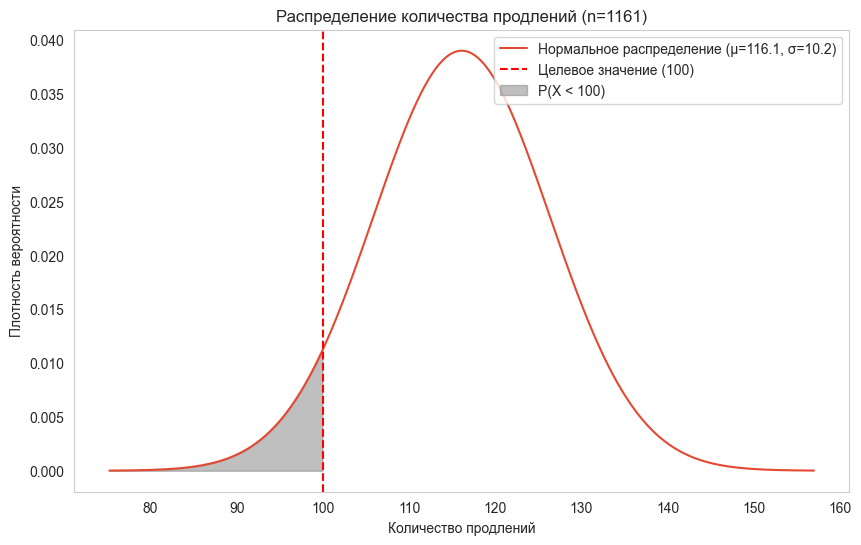

In [111]:
#условия задачи
p = 0.10  
k = 100  
confidence = 0.95 

def find_min_n(p, k, confidence):
    n = k  
    while True:
        prob = 1 - binom.cdf(k - 1, n, p)
        if prob >= confidence:
            return n
        n += 1  

min_n = find_min_n(p, k, confidence)
print(f"Минимальное количество промокодов: {min_n}")

#Построение графика
n = min_n
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Нормальное распределение (μ={mu:.1f}, σ={sigma:.1f})")
plt.axvline(x=k, color='red', linestyle='--', label=f"Целевое значение ({k})")
plt.fill_between(x, y, where=(x < k), color='gray', alpha=0.5, label=f"P(X < {k})")
plt.title(f"Распределение количества продлений (n={n})")
plt.xlabel("Количество продлений")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid()
plt.show()

Мы провели симуляцию по условиям задачи и выяснили , что для того что бы выполнить план с вероятностью **95%** потребуеться в среднем разослать **1161** промоковдов.

### Рассылка push уведомлений.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

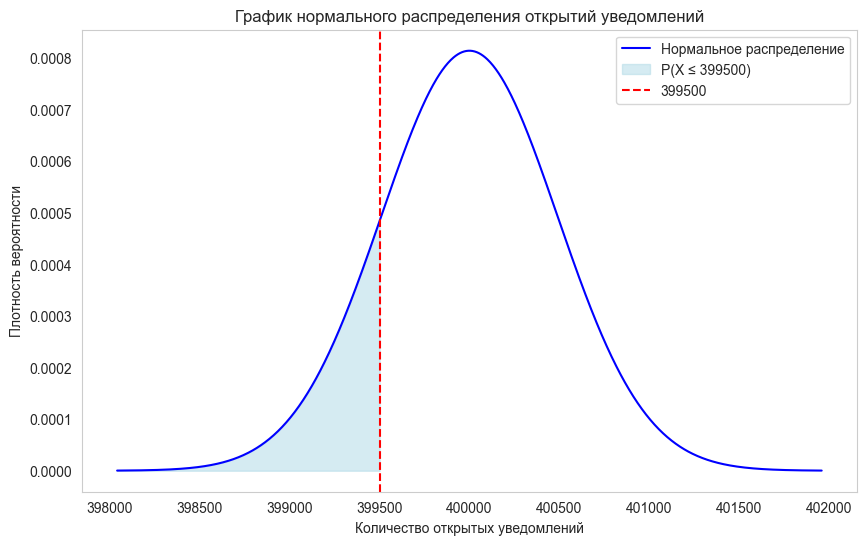

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.1540


In [112]:
n = 1000000
p = 0.4
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

#график
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = distr.pdf(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение', color='blue')

x_fill = np.linspace(mu - 4*sigma, 399500.5, 1000)
y_fill = distr.pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5, label='P(X ≤ 399500)')
plt.axvline(399500, color='red', linestyle='--', label='399500')

plt.title('График нормального распределения открытий уведомлений')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

mes = distr.cdf(399500.5)  
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {mes:.4f}')

Для оценки вероятности мы воспользовались аппроксимацией нормальным распределением и выяснили что процент при заданных условиях задачи составит **15%**.

### Вывод


- На основании уже проведенной рекламной акции мы построили симуляцию и пришли к выводу что для того что бы выполнить план в **100 продливших подписку пользователей** с вероятностью **95%** потребуется разослать примерно **1161** промокодов.


- При оценке успешности промо акции с рассылкой push уведомлений , мы воспользовались кумулятивной функцией нормального распределения и пришли к выводу что шансы на то что уведомления откроют меньше 399,5 тыс. пользователей составит **15%**.


## Общий вывод по всему исследованию

### Блок загрузки данных.

- От сервиса аренды электросамокатов **GoFast** нам поступило 3 набора данных с информацией о пользователях, поездках и существующих тарифных планов. Мы загрузили эти данные создав 3 датафрейма : `df_user, df_ride , df_sub`. При первичном анализе данных сильных аномалий выявлено не было , за исключением переменной `data` которая была представлена в несоответствующем типе данных.


### Блок предобработки данных.

- В созданном нами наборе данных `df_ride` мы преобразовали столбец `date` в надлежащий тип данных **datetime** для возможности дальнейшего с ним взаимодействия. Так же на основании переменной `date` мы создали новый столбец `month` с номером месяца для дальнейшего исследования поведения клиентов в зависимости от значения этой переменной. Набор данных не содержал дубликатов и пропущенных значений.


- В датафрейме `df_user` который изначально содержал **1565** строк, обнаружились дубликаты в размере **31** строки содержащие дублирующую информацию о пользователях , данная проблема предположительно возникла на программном уровне в момент выгрузки данных или же при регистрации пользователя. Было принято решение об их удалении для улучшения чистоты данных , размер датафрема после этой операции составил **1534** строки.


- В присланном наборе данных `df_sub` содержалось всего 2 строки , которые содержали информацию о тарифных планах сервиса **GoFast**. В связи с малым объёмом какая либо обработка не требовалась.


- **В целом мы привели все наши данные в пригодный для исследования вид , узнаем что нам удасться выяснить в следующем блоке исследования**

### Блок с исследовательским анализом данных.


- При анализе **городов** в которых представлен сервис нам удалось выявить несколько закономерностей. В таких крупных городах как **Москва** с развитой системой общественного транспорта активность клиентов оказалась самой низкой , так же такое поведение клиентов может быть вызвано высокой конкуренцией. В свою очередь курортные города **Сочи, Краснодар и Пятигорск** из за постоянного потока туристов и благоприятных погодных условий продемонстрировали повышенный спрос на услуги сервиса. Так же спрос на высоком уровне сохранился в таких городах как **Тюмень, Омск, Ростов-на-Дону, Екатеринбург** предположительно в силу проблем с регулярным движением общественного транспорта.


- При анализе клиентов по типам подписке , удалось установить что показатели распределились следующим образом **54.4%** за пользователями тарифа `free` и **45.5%** за клиентами с подпиской `ultra`. Углубившись в анализ по городам , удалось установить что всего в двух городах **Москве и Омске** клиенты тарифных планов распределились поровну , в остальных городах преобладают клиенты с типом подписки `free`. Возможным объяснением для **Москвы** может служить высокий уровень жизни , что делает подписку `ultra` более доступной для жителей , а в случае **Омсва** предположу что наблюдается спрос на передвижение на средние дистанции на которых как раз тариф `ultra` раскрывает свою выгоду.


- Проанализировав данные о возрасте клиентов удалось установить что целевой группой выступает возрастной диапазон от **19 до 30 лет** эта группа составляет **79%** всех наших данных.


- Рассмотрев дистанцию на которую передвигаются клиенты , удалось прийти к следующим выводам. Основными дистанциями пользующиеся особой популярностью выступили средние расстояние **от 2 до 4км** и сверх малые **от 100м до 1200 0метров**. Сверх длинные дистанции **более 4км** скорей являются исключениями.


- При оценке времени затраченного на поездку , удалось заметить закономерность что среднее время поездки расположилось в диапазоне от **13** до **23** минут. Что согласуется с ранее представленным выводом о пройдённом расстоянии.


   <font size="4" color="green">Рекомендации.</font>


- Проводить более активную рекламную компанию в крупных городах. С целью повысить осведомленность горожан о сервисе.


- Сконцентрироваться на курортных городах и городах где наблюдаются проблемы с общественным транспортом как на более приоритетных направлениях для повышения прибыли.


- Если требуется увеличение объёма клиентов с тарифом `ultra` провести промо акцию с бесплатным пробным периодом для этого тарифа.


- Сконцентрироваться на своей целевой возрастной группе **от 19 до 30 лет** , устанавливая стоянки самокатов в местах скопления молодежи (парках, учебных заведениях , точах общепита)


- Стараться устанавливать точки проката в трудно доступных для общественного транспорта местах или между станциями метро на расстоянии **от 2 до 4км**.


### Блок с объединением данных и их визуализацией.

- Мы провели объединение всех наших входных данных в один датафрейм `df` , а так же создали две выборки по принципу типа подписки `df_prem` и `df_np.


- Так же мы провели визуализацию данных , которые подтверждают выдвинутые в исследовательском блоке данные.


### Блок с подсчетом выручки.

- Мы создали отдельный набор сводных данных , который содержал в себе помесячную прибыль для каждого пользователя `df_profit`

- При анализе этого датафрейма удалось установить , что в процентном соотношении выручка распределилась **57.6% против 42.4%** в пользу пользователей `free`. Но средние значения прибыли за весь период с небольшим перевесом за клиентами с подпиской `ultra`

   <font size="4" color="green">Рекомендации.</font>


- Запуск промо акции для уже существующих пользователей с более выгодными условиями для стимуляции перехода на тип подписки `ultra`


### Блок проверки гипотез для отдела маркетинга


- В ходе проверки выдвинутых гипотез , удалось принять следующие из них :
- **Пользователи с подпиской тратят больше времени на поездки по сравнению с пользователями без подписки.**
- **Среднее расстояние поездки пользователей с подпиской равно 3130 метрам или больше.**
- **Средняя выручка от пользователей с подпиской больше средней выручке от пользователей без подписки.**

### Блок с построением распределений.

- Мы провели симуляцию рассылки промокодов и установили , что для достижения поставленных задач отделу маркетинга нужно разослать минимальное количество промокодов: **1161**


- Так же при оценке успеха рассылки push уведомлений , шанс провала составил **15%**
